# Key Words Scratching on US_CERT

## 載入所需套件

In [1]:
import numpy as np
import nltk
import requests
import pandas as pd
import seaborn as sns
import operator
import re
import codecs
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
%matplotlib inline
# import mysql.connector
# from scipy import sparse
# from sklearn import preprocessing
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.ensemble import RandomForestClassifier

## 預設基礎變數

In [2]:
Time_title=[]
Year_article=[]
temp_time=[str(i) for i in range(2004,2022)]

# 抓取標題以及清洗主文章

## NLTK文詞清洗分析函數

In [3]:
# Preprocess a string.
# :parameter
#     :param text: string - name of column containing text
#     :param lst_stopwords: list - list of stopwords to remove
#     :param flg_stemm: bool - whether stemming is to be applied
#     :param flg_lemm: bool - whether lemmitisation is to be applied
# :return
#     cleaned text
# '''

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and    characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [4]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords.append('network')
lst_stopwords.append('system')
lst_stopwords.append('systems')
lst_stopwords.append('affected')
lst_stopwords.append('cisa')
lst_stopwords.append('actor')
lst_stopwords.append('could')
nltk.download('stopwords')

## 抓取年分,標題,網址,主文

In [71]:
url = "https://us-cert.cisa.gov/ncas/alerts"
url2= "https://us-cert.cisa.gov/ncas/archives/alerts"
url3="https://us-cert.cisa.gov"
for i in temp_time:
    if(i<='2007'):
        print("======="+i+"======")
        temp = url2+'/'+i ##網址
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content")
            for s in sel: 
                article = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords)
                article2 = re.sub(r'http\S+|\w*d+\w*','',article)
                article2 = utils_preprocess_text(article2)
            Time_title.append([i,title,temp2,article2]) 
    else:
        print("======="+i+"======")
        temp = url+'/'+i
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content")
            for s in sel:
                article = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords)
                article2 = re.sub(r'http\S+|\w*d+\w*','',article)
                article2 = utils_preprocess_text(article2)
            Time_title.append([i,title,temp2,article2])

=======2004======
=======2005======
=======2006======
=======2007======
=======2008======
=======2009======
=======2010======
=======2011======
=======2012======
=======2013======
=======2014======
=======2015======
=======2016======
=======2017======
=======2018======
=======2019======
=======2020======
=======2021======


In [81]:
Time_title

[['2004',
  'Exploitation of phpBB highlight parameter vulnerability',
  'https://us-cert.cisa.gov/ncas/archives/alerts/TA04-356A',
  'phpbb version 2010 prior overview software phpbb contains input problem process parameter url phpbb website execute arbitrary gain privilege bulletin phpbb opensource bulletin application improperly performs highlight parameter viewtopicphp may allow remote attacker execute arbitrary vulnerable server report vulnerability actively santya worm worm appears propogate searching viewtopicphp vulnerable site worm writes file m1ho2of overwrites file htm php asp shtm jsp phtm replacing html content web page worm try use perl execute propogate uscert tracking issue vu497400 phpbb viewtopicphp fails properly sanitize input highlight parameter impact remote attacker may able phpbb website execute arbitrary bulletin solution phpbb phpbb version 2011 prevent exploitation reference uscert vulnerability note vu497400 phpbb phpbb announcement symantec security respons

In [72]:
df_temp = pd.DataFrame(columns=['Year','Title','Url','Content'],data=Time_title)
df_temp

Year                                              Title  \
0    2004  Exploitation of phpBB highlight parameter vuln...   
1    2004  Update Available for Microsoft Internet Explor...   
2    2004             Update for Microsoft Internet Explorer   
3    2004                Cisco IOS Input Queue Vulnerability   
4    2004     Buffer Overflow in Microsoft Internet Explorer   
..    ...                                                ...   
341  2021  Mitigate Microsoft Exchange Server Vulnerabili...   
342  2021  Exploitation of Accellion File Transfer Appliance   
343  2021  AppleJeus: Analysis of North Korea’s Cryptocur...   
344  2021       Compromise of U.S. Water Treatment Facility    
345  2021  Detecting Post-Compromise Threat Activity in M...   

                                                   Url  \
0    https://us-cert.cisa.gov/ncas/archives/alerts/...   
1    https://us-cert.cisa.gov/ncas/archives/alerts/...   
2    https://us-cert.cisa.gov/ncas/archives/alerts/...   
3    https://us-cert.cisa.gov/ncas/archives/alerts/...   
4    https://us-cert.cisa.gov/ncas/archives/alerts/...   
..                                                 ...   
341     https://us-cert.cisa.gov/ncas/alerts/aa21-062a   
342     https://us-cert.cisa.gov/ncas/alerts/aa21-055a   
343     https://us-cert.cisa.gov/ncas/alerts/aa21-048a   
344     https://us-cert.cisa.gov/ncas/alerts/aa21-042a   
345     https://us-cert.cisa.gov/ncas/alerts/aa21-008a   

                                               Content  
0    phpbb version 2010 prior overview software php...  
1    microsoft running internet explorer version 6 ...  
2    internet explorer version 60 later overview pr...  
3    cisco router switch line running vulnerable ve...  
4    microsoft running internet explorer version 6 ...  
..                                                 ...  
341  summary note alert march 16 2021 cybersecurity...  
342  summary joint result collaborative effort cybe...  
343  summary u mitre tactic technique common attck ...  
344  summary february 5 2021 cyber actor access sup...  
345  summary u mitre tactic technique common attck ...  

[346 rows x 4 columns]

In [ ]:
url = "https://us-cert.cisa.gov/ncas/alerts"
url2= "https://us-cert.cisa.gov/ncas/archives/alerts"
url3="https://us-cert.cisa.gov"
for i in temp_time:
    if(i<='2007'):
        print("======="+i+"======")
        temp = url2+'/'+i ##網址
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content")
            for s in sel:
                article = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords)
                print(article)
            Time_title.append([i,title,temp2,article])     
    else:
        print("======="+i+"======")
        temp = url+'/'+i
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content")
            for s in sel:
                article2 = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, lst_stopwords = lst_stopwords)
            Time_title.append([i,title,temp2,article2])

# Part1任務處理(keywords/IOC)

## 載入套件

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer


## counting base 萃取

In [ ]:
for i in range(len(df)):
    list = [temp[i]]
    vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
    X = vectorizer.fit_transform(list)
    df_temp = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
    key_words = df_temp.iloc[0].sort_values(ascending=False).index[0:3]
    df['Top_Keywords_2'][i] = key_words[0]+' '+key_words[1]+' '+key_words[2]

df

## TF-IDF萃取

### bow_corpus

In [256]:
import gensim

In [415]:
text_list = df['New_content'].tolist()

In [416]:
words=[]

In [417]:
for i in text_list:
    words.append(i.split())

In [257]:
dictionary = gensim.corpora.Dictionary(words)

In [260]:
bow_corpus = [dictionary.doc2bow(doc) for doc in words]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 3),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 3),
  (15, 3),
  (16, 1),
  (17, 3),
  (18, 4),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 4),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 3),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 11),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 2),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

In [293]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [294]:
corpus_tfidf = tfidf[bow_corpus]

In [336]:
for i in range(len(corpus_tfidf)):
    temp = sorted(corpus_tfidf[i], key = lambda s: s[1],reverse=True)
    print(dictionary[temp[0][0]],dictionary[temp[1][0]],dictionary[temp[2][0]])

phpbb viewtopicphp board
ms04040 webbrowser ta04315a
ta04336a sa04315a sp2
dhcp cisco io
heap ie sp2
active ta04315a ta04336a
drag ms04038 drop
excel october officeexcel
mozilla delalleau gaël
mozilla ta04261a thunderbird
jpeg gdi ms04028
jpeg gdi attachment
kerberos mit doublefree
oracle 10g database
pack xp computer
libpng png image
ms04025 image htmlformatted
pack explorer edition
virus mydoom antivirus
vu106324 vu187196 vu228028
ta04196a uscert july
downloadject ie know
adodbstream article base
dhcp isc vu317350
ms04025 flaw crossdomain
zone ms04025 ie
oracle ebusiness suite
cv readonly authenticated
bgp tcp sequence
snmp cisco io
metafile vu181038 workarounds
activex com ms05054
activex december ta05347a
rendering buffer metafile
november ta05312a vu300549
oracle patch critical
snort orifice preprocessor
ta05284a technology uscert
com object buffer
apple x ta05229a
apple x mac
veritas exec backup
can20051218 can20051983 can20051984
ta05221a august uscert
ipv6 cisco io
oracle patch

## 開始萃取

In [102]:
df_temp = pd.read_csv('0315_topkeywords.csv')
df_temp = df_temp.drop(columns=['Unnamed: 0'])
df_temp

Year                                              Title  \
0    2004  Exploitation of phpBB highlight parameter vuln...   
1    2004             Update for Microsoft Internet Explorer   
2    2004  Update Available for Microsoft Internet Explor...   
3    2004                Cisco IOS Input Queue Vulnerability   
4    2004       Vulnerability in Microsoft Internet Explorer   
..    ...                                                ...   
336  2020  APT Groups Target Healthcare and Essential Ser...   
337  2020     Microsoft Office 365 Security Recommendations    
338  2020  Continued Threat Actor Exploitation Post Pulse...   
339  2020          Guidance on the North Korean Cyber Threat   
340  2021  Detecting Post-Compromise Threat Activity in M...   

                                                   Url  \
0    https://us-cert.cisa.gov/ncas/archives/alerts/...   
1    https://us-cert.cisa.gov/ncas/archives/alerts/...   
2    https://us-cert.cisa.gov/ncas/archives/alerts/...   
3    https://us-cert.cisa.gov/ncas/archives/alerts/...   
4    https://us-cert.cisa.gov/ncas/archives/alerts/...   
..                                                 ...   
336      https://us-cert.cisa.gov/ncas/alerts/AA20126A   
337     https://us-cert.cisa.gov/ncas/alerts/aa20-120a   
338     https://us-cert.cisa.gov/ncas/alerts/aa20-107a   
339     https://us-cert.cisa.gov/ncas/alerts/aa20-106a   
340     https://us-cert.cisa.gov/ncas/alerts/aa21-008a   

                                               Content  \
0    system affected phpbb version 2010 prior overv...   
1    system affected internet explorer version 60 l...   
2    system affected microsoft window system runnin...   
3    system affected cisco router switch line card ...   
4    system affected internet explorer version 60 l...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert us mitre adversari...   
339  summary u department state treasury homeland s...   
340  summary advisory us mitre adversarial tactic t...   

                                           New_content  \
0    phpbb version prior overview software phpbb co...   
1    microsoft window running internet explorer ver...   
2    internet explorer version later overview previ...   
3    cisco router switch line card running vulnerab...   
4    microsoft window running internet explorer ver...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert u mitre adversaria...   
339  summary u department state treasury homeland s...   
340  summary note alert updated march provide guida...   

                                           Clean_title  \
0    exploitation phpbb highlight parameter vulnera...   
1                   update microsoft internet explorer   
2    update available microsoft internet explorer v...   
3                   cisco io input queue vulnerability   
4            vulnerability microsoft internet explorer   
..                                                 ...   
336      apt group target healthcare essential service   
337       microsoft office 365 security recommendation   
338  continued threat actor exploitation post pulse...   
339                 guidance north korean cyber threat   
340  detecting postcompromise threat activity micro...   

                      Top_Keywords               Top_Keywords_2  \
0        phpbb compromised execute       phpbb worm compromised   
1         update explorer internet      internet update ms04040   
2      explorer microsoft internet     update internet explorer   
3                dhcp cisco packet            dhcp cisco packet   
4      update window vulnerability    ie vulnerability internet   
..                             ...            

In [119]:
article = df_temp['Content'].tolist()
article

['system affected phpbb version 2010 prior overview software phpbb contains input validation problem process parameter contained url intruder deface phpbb website execute arbitrary command gain administrative privilege compromised bulletin board description phpbb opensource bulletin board application improperly performs urldecode highlight parameter supplied viewtopicphp may allow remote attacker execute arbitrary command vulnerable server according report vulnerability actively exploited santya worm worm appears propogate searching keyword viewtopicphp order find vulnerable site worm writes file named m1ho2of compromised system overwrites file ending htm php asp shtm jsp phtm replacing html content defaces web page worm try use perl execute compromised system propogate uscert tracking issue vu497400 phpbb viewtopicphp fails properly sanitize input passed highlight parameter impact remote attacker may able deface phpbb website execute arbitrary command compromised bulletin board soluti

In [120]:
article_list=[]
for i in article:
    article_list.append(utils_preprocess_text(re.sub(r'http\S+|\w*\d+\w*','',i)))
article_list

['system affected phpbb version prior overview software phpbb contains input validation problem process parameter contained url intruder deface phpbb website execute arbitrary command gain administrative privilege compromised bulletin board description phpbb opensource bulletin board application improperly performs urldecode highlight parameter supplied viewtopicphp may allow remote attacker execute arbitrary command vulnerable server according report vulnerability actively exploited santya worm worm appears propogate searching keyword viewtopicphp order find vulnerable site worm writes file named compromised system overwrites file ending htm php asp shtm jsp phtm replacing html content defaces web page worm try use perl execute compromised system propogate uscert tracking issue phpbb viewtopicphp fails properly sanitize input passed highlight parameter impact remote attacker may able deface phpbb website execute arbitrary command compromised bulletin board solution upgrade phpbb upgra

In [413]:
article_list[293]

'summary report collaborative research effort cyber security authority five nation australia canada new zealand united kingdom united highlight use five publicly available tool used malicious purpose recent cyber incident around world five tool remote access trojan jbifrost webshell china chopper credential stealer mimikatz lateral movement framework powershell empire obfuscation exfiltration huc packet transmitter aid work network defender system administrator also provide advice limiting effectiveness tool detecting use network individual tool cover report limited example type tool used threat actor consider exhaustive list planning network defense tool technique exploiting network data hold mean preserve nation state criminal dark web today malicious tool variety function widely freely available use everyone skilled penetration tester hostile state actor organized criminal amateur cyber criminal tool activity alert used compromise information across wide range critical sector includ

In [ ]:
sparse_result = tfidf_model.transform(list)
list_dense = sparse_result.todense().tolist()
df_frequency = pd.DataFrame(list_dense,columns=tfidf_model.get_feature_names())
key_words = df_frequency.iloc[0].sort_values(ascending=False).index[0:3]
df['Top_Keywords_2'][i] = key_words[0]+' '+key_words[1]+' '+key_words[2]

### 整體的Top_keywords篩選

In [394]:
df_frequency

aadserviceprincipalsigninlogs   ability     abuse    access  accessed  \
0                       0.006066  0.018197  0.006066  0.121312  0.018197   

   accessing  according   account  acquiring    action  ...  wholesale  \
0   0.024262   0.006066  0.054591   0.006066  0.030328  ...   0.006066   

     window    within   without       wmi  workbook  workspace     would  \
0  0.012131  0.012131  0.018197  0.006066  0.006066   0.006066  0.012131   

       year     zdnet  
0  0.006066  0.006066  

[1 rows x 793 columns]

In [499]:
Top_keywords_filter = []
for i in range(len(df_temp)):
    list = [article_list[i]]
    tfidf_model = TfidfVectorizer().fit(list)
    sparse_result = tfidf_model.transform(list)
    list_dense = sparse_result.todense().tolist()
    df_frequency = pd.DataFrame(list_dense,columns=tfidf_model.get_feature_names())
    key_words = df_frequency.iloc[0].sort_values(ascending=False).index[0:50]
    for k in key_words:
        Top_keywords_filter.append(k)


Top_keywords_filter

['phpbb',
 'execute',
 'worm',
 'compromised',
 'use',
 'arbitrary',
 'system',
 'bulletin',
 'command',
 'board',
 'viewtopicphp',
 'vulnerability',
 'parameter',
 'feedback',
 'product',
 'attacker',
 'propogate',
 'remote',
 'deface',
 'security',
 'file',
 'highlight',
 'software',
 'input',
 'dec',
 'may',
 'version',
 'vulnerable',
 'uscert',
 'updated',
 'urldecode',
 'website',
 'upgrade',
 'impact',
 'find',
 'gain',
 'gennari',
 'history',
 'administrative',
 'htm',
 'html',
 'author',
 'improper',
 'affected',
 'actively',
 'initial',
 'according',
 'internet',
 'intruder',
 'issue',
 'update',
 'internet',
 'explorer',
 'window',
 'vulnerability',
 'security',
 'uscert',
 'alert',
 'technical',
 'cyber',
 'december',
 'product',
 'may',
 'xp',
 'information',
 'control',
 'computer',
 'attacker',
 'added',
 'reference',
 'able',
 'updated',
 'use',
 'take',
 'subject',
 'vulnerable',
 'ie',
 'html',
 'history',
 'feedback',
 'exploiting',
 'description',
 'using',
 'crash',

In [500]:
len(Top_keywords_filter)

17050

In [96]:
tfidf_model = TfidfVectorizer().fit(temp)
sparse_result = tfidf_model.transform(temp)
list_dense = sparse_result.todense().tolist()
df_frequency = pd.DataFrame(list_dense,columns=tfidf_model.get_feature_names())
key_words = df_frequency.iloc[0].sort_values(ascending=False).index[0:7]
key_words

Index(['vulnerability', 'security', 'microsoft', 'bulletin', 'server',
       'service', 'attacker'],
      dtype='object')

In [493]:
filter = key_words.tolist()

In [588]:
filter.append('could')
filter.append('actor')
filter.append('8b')
filter.append('6f')
filter.append('c7')
filter

['vulnerability',
 'microsoft',
 'update',
 'window',
 'server',
 'adobe',
 'apple',
 'could',
 'could',
 'actor',
 'could',
 'actor',
 '8b',
 '6f',
 'could',
 'actor',
 '8b',
 '6f',
 'c7']

### 最終關鍵字萃取

In [603]:
df[df['Year']==2020]

Year                                              Title  \
310  2020  Advanced Persistent Threat Compromise of Gover...   
311  2020  Cyber Actors Target K-12 Distance Learning Edu...   
312  2020  Advanced Persistent Threat Actors Targeting U....   
313  2020  Iranian Advanced Persistent Threat Actor Ident...   
314  2020  Ransomware Activity Targeting the Healthcare a...   
315  2020  North Korean Advanced Persistent Threat Focus:...   
316  2020  Iranian Advanced Persistent Threat Actors Thre...   
317  2020  Russian State-Sponsored Advanced Persistent Th...   
318  2020  APT Actors Chaining Vulnerabilities Against SL...   
319  2020                                     Emotet Malware   
320  2020  Potential for China Cyber Response to Heighten...   
321  2020                                   LokiBot Malware    
322  2020  Iran-Based Threat Actor Exploits VPN Vulnerabi...   
323  2020  Chinese Ministry of State Security-Affiliated ...   
324  2020  Technical Approaches to Uncovering and Remedia...   
325  2020  FASTCash 2.0: North Korea's BeagleBoyz Robbing...   
326  2020       Phishing Emails Used to Deploy KONNI Malware   
327  2020  Malicious Cyber Actor Spoofing COVID-19 Loan R...   
328  2020  Potential Legacy Risk from Malware Targeting Q...   
329  2020  Threat Actor Exploitation of F5 BIG-IP CVE-202...   
330  2020  NSA and CISA Recommend Immediate Actions to Re...   
331  2020  Malicious Cyber Actor Use of Network Tunneling...   
332  2020    Critical Vulnerability in SAP NetWeaver AS Java   
333  2020  Defending Against Malicious Cyber Activity Ori...   
334  2020            EINSTEIN Data Trends – 30-day Lookback    
335  2020         Top 10 Routinely Exploited Vulnerabilities   
336  2020  APT Groups Target Healthcare and Essential Ser...   
337  2020     Microsoft Office 365 Security Recommendations    
338  2020  Continued Threat Actor Exploitation Post Pulse...   
339  2020          Guidance on the North Korean Cyber Threat   

                                                Url  \
310  https://us-cert.cisa.gov/ncas/alerts/aa20-352a   
311  https://us-cert.cisa.gov/ncas/alerts/aa20-345a   
312  https://us-cert.cisa.gov/ncas/alerts/aa20-336a   
313  https://us-cert.cisa.gov/ncas/alerts/aa20-304a   
314  https://us-cert.cisa.gov/ncas/alerts/aa20-302a   
315  https://us-cert.cisa.gov/ncas/alerts/aa20-301a   
316  https://us-cert.cisa.gov/ncas/alerts/aa20-296b   
317  https://us-cert.cisa.gov/ncas/alerts/aa20-296a   
318  https://us-cert.cisa.gov/ncas/alerts/aa20-283a   
319  https://us-cert.cisa.gov/ncas/alerts/aa20-280a   
320  https://us-cert.cisa.gov/ncas/alerts/aa20-275a   
321  https://us-cert.cisa.gov/ncas/alerts/aa20-266a   
322  https://us-cert.cisa.gov/ncas/alerts/aa20-259a   
323  https://us-cert.cisa.gov/ncas/alerts/aa20-258a   
324  https://us-cert.cisa.gov/ncas/alerts/aa20-245a   
325  https://us-cert.cisa.gov/ncas/alerts/aa20-239a   
326  https://us-cert.cisa.gov/ncas/alerts/aa20-227a   
327  https://us-cert.cisa.gov/ncas/alerts/aa20-225a   
328  https://us-cert.cisa.gov/ncas/alerts/aa20-209a   
329  https://us-cert.cisa.gov/ncas/alerts/aa20-206a   
330  https://us-cert.cisa.gov/ncas/alerts/aa20-205a   
331  https://us-cert.cisa.gov/ncas/alerts/aa20-198a   
332  https://us-cert.cisa.gov/ncas/alerts/aa20-195a   
333  https://us-cert.cisa.gov/ncas/alerts/aa20-183a   
334  https://us-cert.cisa.gov/ncas/alerts/aa20-182a   
335  https://us-cert.cisa.gov/ncas/alerts/aa20-133a   
336   https://us-cert.cisa.gov/ncas/alerts/AA20126A   
337  https://us-cert.cisa.gov/ncas/alerts/aa20-120a   
338  https://us-cert.cisa.gov/ncas/alerts/aa20-107a   
339  https://us-cert.cisa.gov/ncas/alerts/aa20-106a   

                                               Content  \
310  summary cybersecurity infrastructure security ...   
311  summary joint cybersecurity advisory coauthore...   
312  summary advisory us mitre adversarial tactic t...   
313  summary advisory us mitre adversarial tactic t...   
314  summary advisory up

In [589]:
Final_keywords = []

In [139]:
for i in range(len(df)):
    list = [article_list[i]]
    tfidf_model = TfidfVectorizer().fit(list)
    sparse_result = tfidf_model.transform(list)
    list_dense = sparse_result.todense().tolist()
    df_frequency = pd.DataFrame(list_dense,columns=tfidf_model.get_feature_names())
    key_words = df_frequency.iloc[0].sort_values(ascending=False).index[0:15]
    count = 0
    for d in key_words:
        if(count == 3):
            break
        if(d not in filter): ##沒在在總filter裡時
            count +=1
            Final_keywords.append(d)
print(len(Final_keywords))          
print(Final_keywords)

TypeError: argument of type 'type' is not iterable

In [149]:
Top_keywords_filter

['phpbb',
 'execute',
 'worm',
 'compromised',
 'use',
 'arbitrary',
 'system',
 'bulletin',
 'command',
 'board',
 'update',
 'internet',
 'explorer',
 'window',
 'vulnerability',
 'security',
 'uscert',
 'alert',
 'technical',
 'cyber',
 'internet',
 'explorer',
 'update',
 'microsoft',
 'security',
 'vulnerability',
 'affected',
 'could',
 'bulletin',
 'information',
 'dhcp',
 'cisco',
 'packet',
 'affected',
 'vulnerability',
 'configuration',
 'io',
 'device',
 'service',
 'version',
 'update',
 'vulnerability',
 'window',
 'updated',
 'active',
 'antivirus',
 'may',
 'security',
 'xp',
 'attacker',
 'vulnerability',
 'ie',
 'internet',
 'window',
 'email',
 'microsoft',
 'security',
 'scripting',
 'code',
 'user',
 'vulnerability',
 'microsoft',
 'could',
 'attacker',
 'ie',
 'file',
 'note',
 'internet',
 'user',
 'activex',
 'update',
 'microsoft',
 'window',
 'october',
 'product',
 'vulnerability',
 'excel',
 'internet',
 'including',
 'explorer',
 'mozilla',
 'vulnerability'

In [501]:
for i in range(len(df)):
    temp=50*i
    content = " ".join(Top_keywords_filter[temp:temp+50])
    df_temp.iloc[i,4] = content
df_temp

Year                                              Title  \
0    2004  Exploitation of phpBB highlight parameter vuln...   
1    2004             Update for Microsoft Internet Explorer   
2    2004  Update Available for Microsoft Internet Explor...   
3    2004                Cisco IOS Input Queue Vulnerability   
4    2004       Vulnerability in Microsoft Internet Explorer   
5    2004     Buffer Overflow in Microsoft Internet Explorer   
6    2004  Multiple Vulnerabilities in Microsoft Internet...   
7    2004  Multiple Vulnerabilities in Microsoft Windows,...   
8    2004       Multiple Vulnerabilities in Mozilla Products   
9    2004       Multiple Vulnerabilities in Mozilla Products   
10   2004   Microsoft Windows JPEG component buffer overflow   
11   2004  Vulnerability in Microsoft Image Processing Co...   
12   2004                  Vulnerabilities in MIT Kerberos 5   
13   2004        Multiple Vulnerabilities in Oracle Products   
14   2004  Security Improvements in Windows XP Service Pa...   
15   2004                 Multiple Vulnerabilities in libpng   
16   2004  Multiple Vulnerabilities in Systems Running Mi...   
17   2004      Critical Vulnerabilities in Microsoft Windows   
18   2004                        New Variant of MyDoom Virus   
19   2004  Multiple Vulnerabilities in Microsoft Windows ...   
20   2004  Multiple Vulnerabilities in Microsoft Windows ...   
21   2004       Important Internet Explorer Update Available   
22   2004  Internet Explorer Update to Disable ADODB.Stre...   
23   2004             Multiple Vulnerabilities in ISC DHCP 3   
24   2004    Cross-Domain Vulnerability in Internet Explorer   
25   2004  Cross-Domain Redirect Vulnerability in Interne...   
26   2004  SQL Injection Vulnerabilities in Oracle E-Busi...   
27   2004                    CVS Heap Overflow Vulnerability   
28   2004                             Vulnerabilities in TCP   
29   2004      Cisco IOS SNMP Message Handling Vulnerability   
30   2005  Microsoft Windows Metafile Handling Buffer Ove...   
31   2005        Microsoft Internet Explorer Vulnerabilities   
32   2005        Microsoft Internet Explorer Vulnerabilities   
33   2005  Microsoft Windows Image Processing Vulnerabili...   
34   2005  Microsoft Windows Image Processing Vulnerabili...   
35   2005   Oracle Products Contain Multiple Vulnerabilities   
36   2005    Snort Back Orifice Preprocessor Buffer Overflow   
37   2005  Microsoft Windows, Internet Explorer, and Exch...   
38   2005  Microsoft Windows, Internet Explorer, and Wind...   
39   2005  Apple Mac Products are Affected by Multiple Vu...   
40   2005            Apple Mac OS X Multiple Vulnerabilities   
41   2005  VERITAS Backup Exec Uses Hard-Coded Authentica...   
42   2005  Microsoft Windows and Internet Explorer Vulner...   
43   2005  Microsoft Windows and Internet Explorer Vulner...   
44   2005                       Cisco IOS IPv6 Vulnerability   
45   2005   Oracle Products Contain Multiple Vulnerabilities   
46   2005  Microsoft Windows, Internet Explorer, and Word...   
47   2005  Microsoft Windows, Internet Explorer, and Word...   
48   2005                      Targeted Trojan Email Attacks   
49   2005  VERITAS Backup Exec Software is actively being...   
50   2005  Microsoft Windows and Internet Explorer Vulner...   
51   2005  Microsoft Windows and Internet Explorer Vulner...   
52   2005  Apple Mac OS X is affected by multiple vulnera...   
53   2005  Apple Mac OS X is affected by multiple vulnera...   
54   2005   Oracle Products Contain Multiple Vulnerabilities   
55   2005  Multiple Vulnerabilities in Microsoft Windows ...   
56   2005  Multiple Vulnerabilities in Microsoft Windows ...   
57   2005  Multiple Vulnerabilities in Microsoft Windows ...   
58   2005  Multiple Vulnerabilities in Microsoft Windows ...   
59   2005  Multiple Denial of Service Vulnerablities in C...   
60   2006         Mozilla Addresses Multiple Vulnerabilities   
61   2006         Mozilla Addresses M

## 比對關鍵字中的malware family

## 觀測文章中是否有提到惡意軟體,有則加入下個欄位(malware)

In [529]:
for i in range(len(df)):
    str1 = df_temp.iloc[i][4]
   # print(str1)
    str2 = re.findall('\w+ware|\w*bot\w*',str1)
    if str(str2) != '[]':
        print(i,str2)
    #df_temp.loc[i,'Malware'] = " ".join(set(str2))

0 ['software']
2 ['software']
4 ['software']
5 ['software']
10 ['software']
11 ['software']
13 ['software']
16 ['software']
17 ['software']
18 ['software']
19 ['software']
20 ['software']
21 ['software']
22 ['software']
24 ['software']
25 ['software']
40 ['software']
41 ['netware']
48 ['software']
49 ['software']
55 ['software']
59 ['software']
80 ['software']
86 ['aware']
92 ['software']
93 ['software']
99 ['software']
101 ['software']
102 ['software']
103 ['software']
104 ['software']
113 ['software']
114 ['software']
121 ['software']
133 ['software']
141 ['software']
149 ['software']
169 ['software']
184 ['software']
197 ['software']
198 ['software']
199 ['software']
202 ['software']
205 ['software']
206 ['software']
208 ['software']
209 ['software']
211 ['software']
213 ['software']
215 ['software']
216 ['firmware', 'firmware']
217 ['software']
218 ['malware', 'ransomware', 'software', 'aware']
219 ['software']
220 ['software']
221 ['software']
222 ['hardware']
224 ['software']
225

In [503]:
df_temp['Malware'] = df_temp['Malware'].map(lambda x: re.sub(r'software|hardware|aware','',x))
df_temp['Malware'] = df_temp['Malware'].map(lambda x: x.strip())
df_temp[df_temp['Malware']!='']

<ipython-input-503-001902f997c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Malware'] = df_temp['Malware'].map(lambda x: re.sub(r'software|hardware|aware','',x))
<ipython-input-503-001902f997c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Malware'] = df_temp['Malware'].map(lambda x: x.strip())


Year                                              Title  \
41   2005  VERITAS Backup Exec Uses Hard-Coded Authentica...   
216  2012  Wi-Fi Protected Setup (WPS) Vulnerable to Brut...   
218  2013                 CryptoLocker Ransomware Infections   
228  2013  Washington, DC Radio Station Web Site Compromises   
231  2013     Microsoft Updates for Multiple Vulnerabilities   
243  2014                       Targeted Destructive Malware   
244  2014                                      Regin Malware   
248  2014                Apple iOS 'Masque Attack' Technique   
250  2014  Phishing Campaign Linked with “Dyre” Banking M...   
251  2014                                  Crypto Ransomware   
254  2014                      Backoff Point-of-Sale Malware   
255  2014                          GameOver Zeus P2P Malware   
260  2014            Malware Targeting Point of Sale Systems   
261  2015                                            Dorkbot   
262  2015  Compromised Web Servers and Web Shells - Threa...   
263  2015                                 Dridex P2P Malware   
265  2015  Recent Email Phishing Campaigns – Mitigation a...   
268  2015          Top 30 Targeted High Risk Vulnerabilities   
269  2015                                       Simda Botnet   
271  2015                                               AAEH   
273  2016  Avalanche (crimeware-as-a-service infrastructure)   
274  2016  Heightened DDoS Threat Posed by Mirai and Othe...   
280  2016                     Ransomware and Recent Variants   
281  2017        HIDDEN COBRA – North Korean Trojan: Volgmer   
282  2017  HIDDEN COBRA – North Korean Remote Administrat...   
284  2017                                  Petya Ransomware    
285  2017  HIDDEN COBRA – North Korea’s DDoS Botnet Infra...   
286  2017                              CrashOverride Malware   
288  2017     Indicators Associated With WannaCry Ransomware   
289  2017  Intrusions Affecting Multiple Victims Across M...   
291  2018                                  SamSam Ransomware   
292  2018              3ve – Major Online Ad Fraud Operation   
296  2018                   HIDDEN COBRA – FASTCash Campaign   
297  2018                                     Emotet Malware   
298  2018  HIDDEN COBRA – Joanap Backdoor Trojan and Bram...   
299  2018  Cyber Actors Target Home and Office Routers an...   
305  2019                                     Dridex Malware   
307  2019  Microsoft Operating Systems BlueKeep Vulnerabi...   
311  2020  Cyber Actors Target K-12 Distance Learning Edu...   
314  2020  Ransomware Activity Targeting the Healthcare a...   
315  2020  North Korean Advanced Persistent Threat Focus:...   
319  2020                                     Emotet Malware   
321  2020                                   LokiBot Malware    
325  2020  FASTCash 2.0: North Korea's BeagleBoyz Robbing...   
326  2020       Phishing Emails Used to Deploy KONNI Malware   
328  2020  Potential Legacy Risk from Malware Targeting Q...   
334  2020            EINSTEIN Data Trends – 30-day Lookback    
335  2020         Top 10 Routinely Exploited Vulnerabilities   
339  2020          Guidance on the North Korean Cyber Threat   

                                                   Url  \
41   https://us-cert.cisa.gov/ncas/archives/alerts/...   
216     https://us-cert.cisa.gov/ncas/alerts/TA12-006A   
218     https://us-cert.cisa.gov/ncas/alerts/TA13-309A   
228     https://us-cert.cisa.gov/ncas/alerts/TA13-141A   
231     https://us-cert.cisa.gov/ncas/alerts/TA13-100A   
243     https://us-cert.cisa.gov/ncas/alerts/TA14-353A   
244     https://us-cert.cisa.gov/ncas/alerts/TA14-329A   
248     https://us-cert.cisa.gov/ncas/alerts/TA14-317A   
250     https://us-cert.cisa.gov/ncas/alerts/TA14-300A   
251     https://us-cert.cisa.gov/ncas/alerts/TA14-295A   
254     https://us-cert.cisa.gov/ncas/alerts/TA14-212A   
255     https://us-cert.cisa.gov/ncas/alerts/TA14-150A   
260     https://us-cert.cisa.gov/ncas/alerts/TA14-

In [703]:
temp=[]
for i,v in enumerate(df_temp['final_keywords']):
    for k in v.split():
        if k.lower() in dic_Family:
            print(i,k)
            df_temp.iloc[i,5] += ' '
#             if k not in df_temp.iloc[i,5]:
                #df_temp.iloc[i,5] += k
            temp.append(k)
temp

18 mydoom
106 mailto
145 conficker


C:\Users\Hsu\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


218 cryptolocker
228 zeroaccess
244 regin
250 dyre
251 cryptolocker
251 zeus
251 cryptowall
255 zeus
255 cryptolocker
260 dexter
263 dridex
269 simda
274 mirai
274 bashlite
280 cryptolocker
280 zeus
280 locky
281 volgmer
284 petya
289 plugx
289 redleaves
290 interception
291 samsam
292 kovter
293 mimikatz
293 htran
296 fastcash
297 emotet
298 joanap
298 brambul
299 blackenergy
300 rogue
305 dridex
305 locky
309 dnspionage
310 sunburst
314 ryuk
314 trickbot
315 kimsuky
315 babyshark
319 emotet
321 lokibot
325 fastcash
326 konni
328 qsnatch
334 kovter


['mydoom',
 'mailto',
 'conficker',
 'cryptolocker',
 'zeroaccess',
 'regin',
 'dyre',
 'cryptolocker',
 'zeus',
 'cryptowall',
 'zeus',
 'cryptolocker',
 'dexter',
 'dridex',
 'simda',
 'mirai',
 'bashlite',
 'cryptolocker',
 'zeus',
 'locky',
 'volgmer',
 'petya',
 'plugx',
 'redleaves',
 'interception',
 'samsam',
 'kovter',
 'mimikatz',
 'htran',
 'fastcash',
 'emotet',
 'joanap',
 'brambul',
 'blackenergy',
 'rogue',
 'dridex',
 'locky',
 'dnspionage',
 'sunburst',
 'ryuk',
 'trickbot',
 'kimsuky',
 'babyshark',
 'emotet',
 'lokibot',
 'fastcash',
 'konni',
 'qsnatch',
 'kovter']

In [623]:
df_FinalMalware

Malware  \
0                                            mydoom   
1                                            mailto   
2                                         conficker   
3                 malware ransomware   cryptolocker   
4                                malware zeroaccess   
5                                     malware regin   
6                                      malware dyre   
7   ransomware malware cryptolocker zeus cryptowall   
8                 malware  botnet zeus cryptolocker   
9                                   malware  dexter   
10                                   malware dridex   
11                             malware botnet simda   
12                    malware botnet mirai bashlite   
13      ransomware malware  cryptolocker zeus locky   
14                                 malware  volgmer   
15                         malware ransomware petya   
16                          malware plugx redleaves   
17                                     interception   
18                        malware ransomware samsam   
19                   malware  botnet malware kovter   
20                      mimikatz htran chinachopper   
21                                malware  fastcash   
22                                   malware emotet   
23                          malware  joanap brambul   
24                              malware blackenergy   
25                                            rogue   
26                                       dnspionage   
27                                  malware  emotet   

                                                 IOCs  \
0                                                       
1                                                       
2                                                       
3                                                       
4                          209.68.32.176 194.165.17.3   
5   61.67.114.73 202.71.144.113 203.199.89.80 194....   
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11                                                      
12                                                      
13                                                      
14  https://us-cert.cisa.gov/sites/default/files/p...   
15  https://us-cert.cisa.gov/sites/default/files/p...   
16  https://us-cert.cisa.gov/sites/default/files/p...   
17                                                      
18                                                      
19                                                      
20                   5001ef50c7e869253a7c152a638eab8a   
21  https://us-cert.cisa.gov/ncas/analysis-reports...   
22                                                      
23  https://us-cert.cisa.gov/sites/default/files/p...   
24                                                      
25                                                      
26  https://us-cert.cisa.gov/sites/default/files/p...   
27                                                      

                                                  CVE  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4       ['cve20100188', 'cve20090927', 'cve20130422']   
5                                                  []   
6                      ['cve20100188', 'cve20132729']   
7                                                  []   
8                                                  []   
9                                                  []   
10                                                 []   
11                                                 []   
12                                                 []

In [515]:
set(temp)

{18,
 106,
 145,
 218,
 228,
 244,
 250,
 251,
 255,
 260,
 263,
 269,
 274,
 280,
 281,
 284,
 289,
 290,
 291,
 292,
 293,
 296,
 297,
 298,
 299,
 300,
 305,
 309,
 310,
 314,
 315,
 319,
 321,
 325,
 326,
 328,
 334}

In [622]:
len(set(temp))

37

In [507]:
len(df_temp[df_temp['Malware']!=''])

57

In [447]:
pd.set_option('display.max_rows', None)

In [628]:
df_temp[df_temp['Malware']!='']

Year                                              Title  \
18   2004                        New Variant of MyDoom Virus   
41   2005  VERITAS Backup Exec Uses Hard-Coded Authentica...   
106  2007  Adobe Updates for Microsoft Windows URI Vulner...   
145  2009   Conficker Worm Targets Microsoft Windows Systems   
216  2012  Wi-Fi Protected Setup (WPS) Vulnerable to Brut...   
218  2013                 CryptoLocker Ransomware Infections   
228  2013  Washington, DC Radio Station Web Site Compromises   
231  2013     Microsoft Updates for Multiple Vulnerabilities   
243  2014                       Targeted Destructive Malware   
244  2014                                      Regin Malware   
248  2014                Apple iOS 'Masque Attack' Technique   
250  2014  Phishing Campaign Linked with “Dyre” Banking M...   
251  2014                                  Crypto Ransomware   
254  2014                      Backoff Point-of-Sale Malware   
255  2014                          GameOver Zeus P2P Malware   
260  2014            Malware Targeting Point of Sale Systems   
261  2015                                            Dorkbot   
262  2015  Compromised Web Servers and Web Shells - Threa...   
263  2015                                 Dridex P2P Malware   
265  2015  Recent Email Phishing Campaigns – Mitigation a...   
268  2015          Top 30 Targeted High Risk Vulnerabilities   
269  2015                                       Simda Botnet   
271  2015                                               AAEH   
273  2016  Avalanche (crimeware-as-a-service infrastructure)   
274  2016  Heightened DDoS Threat Posed by Mirai and Othe...   
280  2016                     Ransomware and Recent Variants   
281  2017        HIDDEN COBRA – North Korean Trojan: Volgmer   
282  2017  HIDDEN COBRA – North Korean Remote Administrat...   
284  2017                                  Petya Ransomware    
285  2017  HIDDEN COBRA – North Korea’s DDoS Botnet Infra...   
286  2017                              CrashOverride Malware   
288  2017     Indicators Associated With WannaCry Ransomware   
289  2017  Intrusions Affecting Multiple Victims Across M...   
290  2017            HTTPS Interception Weakens TLS Security   
291  2018                                  SamSam Ransomware   
292  2018              3ve – Major Online Ad Fraud Operation   
293  2018  Publicly Available Tools Seen in Cyber Inciden...   
296  2018                   HIDDEN COBRA – FASTCash Campaign   
297  2018                                     Emotet Malware   
298  2018  HIDDEN COBRA – Joanap Backdoor Trojan and Bram...   
299  2018  Cyber Actors Target Home and Office Routers an...   
300  2018       Side-Channel Vulnerability Variants 3a and 4   
305  2019                                     Dridex Malware   
307  2019  Microsoft Operating Systems BlueKeep Vulnerabi...   
309  2019              DNS Infrastructure Hijacking Campaign   
310  2020  Advanced Persistent Threat Compromise of Gover...   
311  2020  Cyber Actors Target K-12 Distance Learning Edu...   
314  2020  Ransomware Activity Targeting the Healthcare a...   
315  2020  North Korean Advanced Persistent Threat Focus:...   
319  2020                                     Emotet Malware   
321  2020                                   LokiBot Malware    
325  2020  FASTCash 2.0: North Korea's BeagleBoyz Robbing...   
326  2020       Phishing Emails Used to Deploy KONNI Malware   
328  2020  Potential Legacy Risk from Malware Targeting Q...   
334  2020            EINSTEIN Data Trends – 30-day Lookback    
335  2020         Top 10 Routinely Exploited Vulnerabilities   
339  2020          Guidance on the North Korean Cyber Threat   

                                                   Url  \
18   https://us-cert.cisa.gov/ncas/archives/alerts/...   
41   https://us-cert.cisa.gov/ncas/archives/alerts/...   
106  https://us-cert.cisa.gov/ncas/archives/alerts/...   
145     https://us-cert.cisa.gov/ncas/alerts/TA09-088A   
21

In [510]:
df_temp.iloc[293,4]

'network threat actor tool use powershell security used server system guidance uk access ncsc see mimikatz rat malicious web credential window empire htran cyber victim china chopper application detection activity also connection administrator host report user using available remote nccic capability prevent compromise webshell across defender make jbifrost new microsoft'

In [508]:
df_temp.to_csv('0323_malware_50.csv')

## Reshape 37支 malware(csv)

In [561]:
import math

In [644]:
df_malware = pd.read_csv('0323_malware_55.csv',  engine='python')
df_malware = df_malware.drop(columns=['Unnamed: 0'])
# df_malware = df_malware.reset_index(inplace=True)
# df_malware['Malware'] = df_malware['Malware'].map(lambda x: re.sub(r'software|hardware|aware|jason|netware|firmware|leverage','',x))
# df_malware['IOCs'] = df_malware['IOCs'].map(lambda x: re.sub(r'\n',' ',x))
# df_malware['Malware'] = df_malware['Malware'].map(lambda x: x.strip())
# df_malware[df_malware['Malware']!='']
df_malware

Year  \
0                                                 2004   
1                                                 2004   
2                                                 2004   
3                                                 2004   
4                                                 2004   
5                                                 2004   
6                                                 2004   
7                                                 2004   
8                                                 2004   
9                                                 2004   
10                                                2004   
11                                                2004   
12                                                2004   
13                                                2004   
14                                                2004   
15                                                2004   
16                                                2004   
17                                                2004   
18                                                2004   
19                                                2004   
20                                                2004   
21                                                2004   
22                                                2004   
23                                                2004   
24                                                2004   
25                                                2004   
26                                                2004   
27                                                2004   
28                                                2004   
29                                                2004   
30                                                2005   
31                                                2005   
32                                                2005   
33                                                2005   
34                                                2005   
35                                                2005   
36                                                2005   
37                                                2005   
38                                                2005   
39                                                2005   
40                                                2005   
41                                                2005   
42                                                2005   
43                                                2005   
44                                                2005   
45                                                2005   
46                                                2005   
47                                                2005   
48                                                2005   
49                                                2005   
50                                                2005   
51                                                2005   
52                                                2005   
53                                                2005   
54                                                2005   
55                                                2005   
56                                                2005   
57                                                2005   
58                                                2005   
59                                                2005   
60                                                2006   
61                                                2006   
62                                                2006   
63                                                2006   
64                                                2006   
65                                                2006   
66                                                2006   
67                                                2006   
68                                              

In [668]:
df_FinalMalware = df_temp.iloc[malwareIndex,[5,6,7,2]]
df_FinalMalware = df_FinalMalware.rename(columns={'Url':'Reference'})
df_FinalMalware['Malware'] = df_FinalMalware['Malware'].map(lambda x: re.sub(r'malware|ransomware|botnet','',x))
df_FinalMalware

Malware  \
18                            mydoom     
106                            mailto    
145                         conficker    
218                      cryptolocker    
228                        zeroaccess    
244                             regin    
250                              dyre    
251    cryptolocker zeus cryptowall      
255                zeus cryptolocker     
260                            dexter    
263                            dridex    
269                             simda    
274                   mirai bashlite     
280         cryptolocker zeus locky      
281                           volgmer    
284                             petya    
289                  plugx redleaves     
290                      interception    
291                            samsam    
292                            kovter    
293                   mimikatz htran     
296                          fastcash    
297                            emotet    
298                   joanap brambul     
299                       blackenergy    
300                             rogue    
305                     dridex locky     
309                        dnspionage    
310                          sunburst    
314                 trickbot   ryuk      
315                kimsuky babyshark     
319                            emotet    
321                          lokibot     
325                          fastcash    
326                             konni    
328                  firmware qsnatch    
334                            kovter    

                                                  IOCs  \
18                                                 NaN   
106                                                NaN   
145                                                NaN   
218                                                NaN   
228                                                NaN   
244                                                NaN   
250                                                NaN   
251                                                NaN   
255                                                NaN   
260                                                NaN   
263                                                NaN   
269                                                NaN   
274                                                NaN   
280                                                NaN   
281  https://us-cert.cisa.gov/sites/default/files/p...   
284  https://us-cert.cisa.gov/sites/default/files/p...   
289  https://us-cert.cisa.gov/sites/default/files/p...   
290                                                NaN   
291                                                NaN   
292                                                NaN   
293                                                NaN   
296                                                NaN   
297                                                NaN   
298                                                NaN   
299                                                NaN   
300                                                NaN   
305  https://www.us-cert.gov/sites/default/files/pu...   
309  https://us-cert.cisa.gov/sites/default/files/p...   
310  https://us-cert.cisa.gov/sites/default/files/p...   
314  https://us-cert.cisa.gov/sites/default/files/p...   
315  https://us-cert.cisa.gov/sites/default/files/p...   
319                                                NaN   
321                                                NaN   
325                                                NaN   
326                                                NaN   
328  https://us-cert.cisa.gov/sites/default/files/p...   
334                                                NaN   

                                                   CVE  \
18                                                  []   
106                                                 []   
145                                                 [] 

In [675]:
df_FinalMalware = df_FinalMalware.reset_index()
df_FinalMalware

index                            Malware  \
0      18                           mydoom     
1     106                            mailto    
2     145                         conficker    
3     218                      cryptolocker    
4     228                        zeroaccess    
5     244                             regin    
6     250                              dyre    
7     251    cryptolocker zeus cryptowall      
8     255                zeus cryptolocker     
9     260                            dexter    
10    263                            dridex    
11    269                             simda    
12    274                   mirai bashlite     
13    280         cryptolocker zeus locky      
14    281                           volgmer    
15    284                             petya    
16    289                  plugx redleaves     
17    290                      interception    
18    291                            samsam    
19    292                            kovter    
20    293                   mimikatz htran     
21    296                          fastcash    
22    297                            emotet    
23    298                   joanap brambul     
24    299                       blackenergy    
25    300                             rogue    
26    305                     dridex locky     
27    309                        dnspionage    
28    310                          sunburst    
29    314                 trickbot   ryuk      
30    315                kimsuky babyshark     
31    319                            emotet    
32    321                          lokibot     
33    325                          fastcash    
34    326                             konni    
35    328                  firmware qsnatch    
36    334                            kovter    

                                                 IOCs  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14  https://us-cert.cisa.gov/sites/default/files/p...   
15  https://us-cert.cisa.gov/sites/default/files/p...   
16  https://us-cert.cisa.gov/sites/default/files/p...   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24                                                NaN   
25                                                NaN   
26  https://www.us-cert.gov/sites/default/files/pu...   
27  https://us-cert.cisa.gov/sites/default/files/p...   
28  https://us-cert.cisa.gov/sites/default/files/p...   
29  https://us-cert.cisa.gov/sites/default/files/p...   
30  https://us-cert.cisa.gov/sites/default/files/p...   
31                                                NaN   
32                                                NaN   
33                                                NaN   
34                                                NaN   
35  https://us-cert.cisa.gov/sites/default/files/p...   
36                                                NaN   

            

In [680]:
df_newMalware = pd.DataFrame(data=temp)
df_newMalware = df_newMalware.rename(columns={0:'index'})
df_newMalware = df_newMalware.merge(df_FinalMalware,how='outer',on='index')
df_newMalware

index             1                            Malware  \
0      18        mydoom                           mydoom     
1     106        mailto                            mailto    
2     145     conficker                         conficker    
3     218  cryptolocker                      cryptolocker    
4     228    zeroaccess                        zeroaccess    
5     244         regin                             regin    
6     250          dyre                              dyre    
7     251  cryptolocker    cryptolocker zeus cryptowall      
8     251          zeus    cryptolocker zeus cryptowall      
9     251    cryptowall    cryptolocker zeus cryptowall      
10    255          zeus                zeus cryptolocker     
11    255  cryptolocker                zeus cryptolocker     
12    260        dexter                            dexter    
13    263        dridex                            dridex    
14    269         simda                             simda    
15    274         mirai                   mirai bashlite     
16    274      bashlite                   mirai bashlite     
17    280  cryptolocker         cryptolocker zeus locky      
18    280          zeus         cryptolocker zeus locky      
19    280         locky         cryptolocker zeus locky      
20    281       volgmer                           volgmer    
21    284         petya                             petya    
22    289         plugx                  plugx redleaves     
23    289     redleaves                  plugx redleaves     
24    290  interception                      interception    
25    291        samsam                            samsam    
26    292        kovter                            kovter    
27    293      mimikatz                   mimikatz htran     
28    293         htran                   mimikatz htran     
29    296      fastcash                          fastcash    
30    297        emotet                            emotet    
31    298        joanap                   joanap brambul     
32    298       brambul                   joanap brambul     
33    299   blackenergy                       blackenergy    
34    300         rogue                             rogue    
35    305        dridex                     dridex locky     
36    305         locky                     dridex locky     
37    309    dnspionage                        dnspionage    
38    310      sunburst                          sunburst    
39    314          ryuk                 trickbot   ryuk      
40    314      trickbot                 trickbot   ryuk      
41    315       kimsuky                kimsuky babyshark     
42    315     babyshark                kimsuky babyshark     
43    319        emotet                            emotet    
44    321       lokibot                          lokibot     
45    325      fastcash                          fastcash    
46    326         konni                             konni    
47    328       qsnatch                  firmware qsnatch    
48    334        kovter                            kovter    

                                                 IOCs  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                              

In [681]:
df_newMalware = df_newMalware.drop(columns=['Malware','index'])
df_newMalware = df_newMalware.rename(columns={1:'MalwareFamily'})
df_newMalware

MalwareFamily                                               IOCs  \
0         mydoom                                                NaN   
1         mailto                                                NaN   
2      conficker                                                NaN   
3   cryptolocker                                                NaN   
4     zeroaccess                                                NaN   
5          regin                                                NaN   
6           dyre                                                NaN   
7   cryptolocker                                                NaN   
8           zeus                                                NaN   
9     cryptowall                                                NaN   
10          zeus                                                NaN   
11  cryptolocker                                                NaN   
12        dexter                                                NaN   
13        dridex                                                NaN   
14         simda                                                NaN   
15         mirai                                                NaN   
16      bashlite                                                NaN   
17  cryptolocker                                                NaN   
18          zeus                                                NaN   
19         locky                                                NaN   
20       volgmer  https://us-cert.cisa.gov/sites/default/files/p...   
21         petya  https://us-cert.cisa.gov/sites/default/files/p...   
22         plugx  https://us-cert.cisa.gov/sites/default/files/p...   
23     redleaves  https://us-cert.cisa.gov/sites/default/files/p...   
24  interception                                                NaN   
25        samsam                                                NaN   
26        kovter                                                NaN   
27      mimikatz                                                NaN   
28         htran                                                NaN   
29      fastcash                                                NaN   
30        emotet                                                NaN   
31        joanap                                                NaN   
32       brambul                                                NaN   
33   blackenergy                                                NaN   
34         rogue                                                NaN   
35        dridex  https://www.us-cert.gov/sites/default/files/pu...   
36         locky  https://www.us-cert.gov/sites/default/files/pu...   
37    dnspionage  https://us-cert.cisa.gov/sites/default/files/p...   
38      sunburst  https://us-cert.cisa.gov/sites/default/files/p...   
39          ryuk  https://us-cert.cisa.gov/sites/default/files/p...   
40      trickbot  https://us-cert.cisa.gov/sites/default/files/p...   
41       kimsuky  https://us-cert.cisa.gov/sites/default/files/p...   
42     babyshark  https://us-cert.cisa.gov/sites/default/files/p...   
43        emotet                                                NaN   
44       lokibot                                                NaN   
45      fastcash                                                NaN   
46         konni                                                NaN   
47       qsnatch  https://us-cert.cisa.gov/sites/default/files/p...   
48        kovter                                                NaN   

                                                  CVE  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4       ['cve20100188', 'cve20090927', 'cve20130422']   
5                                                  []   
6                      ['cve20100188', 'cve20132729']

In [712]:
df_newMalware = df_newMalware.drop(index=[3,7,8,10,26,11,30,13,29,19])

KeyError: '[ 3  7  8 10 26 11 30 13 29] not found in axis'

In [697]:
ID = df_newMalware['Reference'].tolist()
idUnique = []
for i in ID:
    idUnique.append(i[-9:])
df_newMalware['ID'] = idUnique

In [688]:
df_newMalware = df_newMalware.iloc[:,[4,0,1,2,3]]
df_newMalware

ID MalwareFamily  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-309A  cryptolocker   
4   TA13-141A    zeroaccess   
5   TA14-329A         regin   
6   TA14-300A          dyre   
7   TA14-295A  cryptolocker   
8   TA14-295A          zeus   
9   TA14-295A    cryptowall   
10  TA14-150A          zeus   
11  TA14-150A  cryptolocker   
12  TA14-002A        dexter   
13  TA15-286A        dridex   
14  TA15-105A         simda   
15  TA16-288A         mirai   
16  TA16-288A      bashlite   
17  TA16-091A  cryptolocker   
18  TA16-091A          zeus   
19  TA16-091A         locky   
20  TA17-318B       volgmer   
21  TA17-181A         petya   
22  TA17-117A         plugx   
23  TA17-117A     redleaves   
24  TA17-075A  interception   
25  AA18-337A        samsam   
26  TA18-331A        kovter   
27  AA18-284A      mimikatz   
28  AA18-284A         htran   
29  TA18-275A      fastcash   
30  TA18-201A        emotet   
31  TA18-149A        joanap   
32  TA18-149A       brambul   
33  TA18-145A   blackenergy   
34  TA18-141A         rogue   
35  aa19-339a        dridex   
36  aa19-339a         locky   
37  AA19-024A    dnspionage   
38  aa20-352a      sunburst   
39  aa20-302a          ryuk   
40  aa20-302a      trickbot   
41  aa20-301a       kimsuky   
42  aa20-301a     babyshark   
43  aa20-280a        emotet   
44  aa20-266a       lokibot   
45  aa20-239a      fastcash   
46  aa20-227a         konni   
47  aa20-209a       qsnatch   
48  aa20-182a        kovter   

                                                 IOCs  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20  https://us-cert.cisa.gov/sites/default/files/p...   
21  https://us-cert.cisa.gov/sites/default/files/p...   
22  https://us-cert.cisa.gov/sites/default/files/p...   
23  https://us-cert.cisa.gov/sites/default/files/p...   
24                                                NaN   
25                                                NaN   
26                                                NaN   
27                                                NaN   
28                                                NaN   
29                                                NaN   
30                                                NaN   
31                                                NaN   
32                                                NaN   
33                                                NaN   
34                                                NaN   
35  https://www.us-cert.gov/sites/default/files/pu...   
36  https://www.us-cert.gov/sites/default/files/pu...   
37  https://us-cert.cisa.gov/sites/default/files/p...   
38  https://us-cert.cisa.gov/sites/default/files/p...   
39  https://us-cert.cisa.gov/sites/default/files/p...   
40  https://us-cert.cisa.gov/sites/default/files/p...   
41  https://us-cert.cisa.gov/sites/default/files/p...   
42  https

In [691]:
df_newMalware.iloc[5,2] = '61.67.114.73 202.71.144.113 203.199.89.80 194.183.237.145'
df_newMalware.iloc[4,2] = '209.68.32.176 194.165.17.3'
df_newMalware

ID MalwareFamily  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-309A  cryptolocker   
4   TA13-141A    zeroaccess   
5   TA14-329A         regin   
6   TA14-300A          dyre   
7   TA14-295A  cryptolocker   
8   TA14-295A          zeus   
9   TA14-295A    cryptowall   
10  TA14-150A          zeus   
11  TA14-150A  cryptolocker   
12  TA14-002A        dexter   
13  TA15-286A        dridex   
14  TA15-105A         simda   
15  TA16-288A         mirai   
16  TA16-288A      bashlite   
17  TA16-091A  cryptolocker   
18  TA16-091A          zeus   
19  TA16-091A         locky   
20  TA17-318B       volgmer   
21  TA17-181A         petya   
22  TA17-117A         plugx   
23  TA17-117A     redleaves   
24  TA17-075A  interception   
25  AA18-337A        samsam   
26  TA18-331A        kovter   
27  AA18-284A      mimikatz   
28  AA18-284A         htran   
29  TA18-275A      fastcash   
30  TA18-201A        emotet   
31  TA18-149A        joanap   
32  TA18-149A       brambul   
33  TA18-145A   blackenergy   
34  TA18-141A         rogue   
35  aa19-339a        dridex   
36  aa19-339a         locky   
37  AA19-024A    dnspionage   
38  aa20-352a      sunburst   
39  aa20-302a          ryuk   
40  aa20-302a      trickbot   
41  aa20-301a       kimsuky   
42  aa20-301a     babyshark   
43  aa20-280a        emotet   
44  aa20-266a       lokibot   
45  aa20-239a      fastcash   
46  aa20-227a         konni   
47  aa20-209a       qsnatch   
48  aa20-182a        kovter   

                                                 IOCs  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                          209.68.32.176 194.165.17.3   
5   61.67.114.73 202.71.144.113 203.199.89.80 194....   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20  https://us-cert.cisa.gov/sites/default/files/p...   
21  https://us-cert.cisa.gov/sites/default/files/p...   
22  https://us-cert.cisa.gov/sites/default/files/p...   
23  https://us-cert.cisa.gov/sites/default/files/p...   
24                                                NaN   
25                                                NaN   
26                                                NaN   
27                                                NaN   
28                                                NaN   
29                                                NaN   
30                                                NaN   
31                                                NaN   
32                                                NaN   
33                                                NaN   
34                                                NaN   
35  https://www.us-cert.gov/sites/default/files/pu...   
36  https://www.us-cert.gov/sites/default/files/pu...   
37  https://us-cert.cisa.gov/sites/default/files/p...   
38  https://us-cert.cisa.gov/sites/default/files/p...   
39  https://us-cert.cisa.gov/sites/default/files/p...   
40  https://us-cert.cisa.gov/sites/default/files/p...   
41  https://us-cert.cisa.gov/sites/default/files/p...   
42  https

In [615]:
df_FinalMalware = df_FinalMalware.rename(columns={'Url':'Reference'})
df_FinalMalware

Year                                              Title  \
18   2004                        New Variant of MyDoom Virus   
106  2007  Adobe Updates for Microsoft Windows URI Vulner...   
145  2009   Conficker Worm Targets Microsoft Windows Systems   
218  2013                 CryptoLocker Ransomware Infections   
228  2013  Washington, DC Radio Station Web Site Compromises   
244  2014                                      Regin Malware   
250  2014  Phishing Campaign Linked with ?�Dyre??Banking ...   
251  2014                                  Crypto Ransomware   
255  2014                          GameOver Zeus P2P Malware   
260  2014            Malware Targeting Point of Sale Systems   
263  2015                                 Dridex P2P Malware   
269  2015                                       Simda Botnet   
274  2016  Heightened DDoS Threat Posed by Mirai and Othe...   
280  2016                     Ransomware and Recent Variants   
281  2017        HIDDEN COBRA ??North Korean Trojan: Volgmer   
284  2017                                  Petya Ransomware    
289  2017  Intrusions Affecting Multiple Victims Across M...   
290  2017            HTTPS Interception Weakens TLS Security   
291  2018                                  SamSam Ransomware   
292  2018              3ve ??Major Online Ad Fraud Operation   
293  2018  Publicly Available Tools Seen in Cyber Inciden...   
296  2018                   HIDDEN COBRA ??FASTCash Campaign   
297  2018                                     Emotet Malware   
298  2018  HIDDEN COBRA ??Joanap Backdoor Trojan and Bram...   
299  2018  Cyber Actors Target Home and Office Routers an...   
300  2018       Side-Channel Vulnerability Variants 3a and 4   
310  2019              DNS Infrastructure Hijacking Campaign   
321  2020                                     Emotet Malware   

                                             Reference  \
18   https://us-cert.cisa.gov/ncas/archives/alerts/...   
106  https://us-cert.cisa.gov/ncas/archives/alerts/...   
145     https://us-cert.cisa.gov/ncas/alerts/TA09-088A   
218     https://us-cert.cisa.gov/ncas/alerts/TA13-309A   
228     https://us-cert.cisa.gov/ncas/alerts/TA13-141A   
244     https://us-cert.cisa.gov/ncas/alerts/TA14-329A   
250     https://us-cert.cisa.gov/ncas/alerts/TA14-300A   
251     https://us-cert.cisa.gov/ncas/alerts/TA14-295A   
255     https://us-cert.cisa.gov/ncas/alerts/TA14-150A   
260     https://us-cert.cisa.gov/ncas/alerts/TA14-002A   
263     https://us-cert.cisa.gov/ncas/alerts/TA15-286A   
269     https://us-cert.cisa.gov/ncas/alerts/TA15-105A   
274     https://us-cert.cisa.gov/ncas/alerts/TA16-288A   
280     https://us-cert.cisa.gov/ncas/alerts/TA16-091A   
281     https://us-cert.cisa.gov/ncas/alerts/TA17-318B   
284     https://us-cert.cisa.gov/ncas/alerts/TA17-181A   
289     https://us-cert.cisa.gov/ncas/alerts/TA17-117A   
290     https://us-cert.cisa.gov/ncas/alerts/TA17-075A   
291     https://us-cert.cisa.gov/ncas/alerts/AA18-337A   
292     https://us-cert.cisa.gov/ncas/alerts/TA18-331A   
293     https://us-cert.cisa.gov/ncas/alerts/AA18-284A   
296     https://us-cert.cisa.gov/ncas/alerts/TA18-275A   
297     https://us-cert.cisa.gov/ncas/alerts/TA18-201A   
298     https://us-cert.cisa.gov/ncas/alerts/TA18-149A   
299     https://us-cert.cisa.gov/ncas/alerts/TA18-145A   
300     https://us-cert.cisa.gov/ncas/alerts/TA18-141A   
310     https://us-cert.cisa.gov/ncas/alerts/AA19-024A   
321     https://us-cert.cisa.gov/ncas/alerts/aa20-280a   

                                               Content  \
18   system affected microsoft window system overvi...   
106  system affected microsoft window xp window ser...   
145  system affected microsoft window overview usce...   
218  system affected microsoft window system runnin...   
228  system affected microsoft window system runnin...   
244  system affected microsoft window nt 2000 xp vi...   
250  system affected microsoft window overview sinc...   
2

In [724]:
df_newMalware = df_newMalware.drop(columns=['index'])
df_newMalware

ID MalwareFamily  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-141A    zeroaccess   
4   TA14-329A         regin   
5   TA14-300A          dyre   
6   TA14-295A    cryptowall   
7   TA14-002A        dexter   
8   TA15-105A         simda   
9   TA16-288A         mirai   
10  TA16-288A      bashlite   
11  TA16-091A  cryptolocker   
12  TA16-091A          zeus   
13  TA17-318B       volgmer   
14  TA17-181A         petya   
15  TA17-117A         plugx   
16  TA17-117A     redleaves   
17  TA17-075A  interception   
18  AA18-337A        samsam   
19  AA18-284A      mimikatz   
20  AA18-284A         htran   
21  TA18-149A        joanap   
22  TA18-149A       brambul   
23  TA18-145A   blackenergy   
24  TA18-141A         rogue   
25  aa19-339a        dridex   
26  aa19-339a         locky   
27  AA19-024A    dnspionage   
28  aa20-352a      sunburst   
29  aa20-302a          ryuk   
30  aa20-302a      trickbot   
31  aa20-301a       kimsuky   
32  aa20-301a     babyshark   
33  aa20-280a        emotet   
34  aa20-266a       lokibot   
35  aa20-239a      fastcash   
36  aa20-227a         konni   
37  aa20-209a       qsnatch   
38  aa20-182a        kovter   

                                                 IOCs  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                          209.68.32.176 194.165.17.3   
4   61.67.114.73 202.71.144.113 203.199.89.80 194....   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13  https://us-cert.cisa.gov/sites/default/files/p...   
14  https://us-cert.cisa.gov/sites/default/files/p...   
15  https://us-cert.cisa.gov/sites/default/files/p...   
16  https://us-cert.cisa.gov/sites/default/files/p...   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24                                                NaN   
25  https://www.us-cert.gov/sites/default/files/pu...   
26  https://www.us-cert.gov/sites/default/files/pu...   
27  https://us-cert.cisa.gov/sites/default/files/p...   
28  https://us-cert.cisa.gov/sites/default/files/p...   
29  https://us-cert.cisa.gov/sites/default/files/p...   
30  https://us-cert.cisa.gov/sites/default/files/p...   
31  https://us-cert.cisa.gov/sites/default/files/p...   
32  https://us-cert.cisa.gov/sites/default/files/p...   
33                                                NaN   
34                                                NaN   
35                                                NaN   
36                                                NaN   
37  https://us-cert.cisa.gov/sites/default/files/p...   
38                                                NaN   

                                                  CVE  \
0                                                  []   
1                                                  []   
2                                                  []   
3       ['cve20100188', 'cve20090927', 'cve20130422']   
4                                                  []   
5                      ['cve20100188', 'cve20132729']   
6                                                  []   
7                                

In [727]:
df_newMalware['IP']=''
df_newMalware['Domain']=''
df_newMalware['Hash']=''
df_newMalware = df_newMalware.rename(columns={'IOCs':'IP'})
df_newMalware = df_newMalware.iloc[:,[0,1,2,3,6,7,4]]
df_newMalware

ID MalwareFamily  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-141A    zeroaccess   
4   TA14-329A         regin   
5   TA14-300A          dyre   
6   TA14-295A    cryptowall   
7   TA14-002A        dexter   
8   TA15-105A         simda   
9   TA16-288A         mirai   
10  TA16-288A      bashlite   
11  TA16-091A  cryptolocker   
12  TA16-091A          zeus   
13  TA17-318B       volgmer   
14  TA17-181A         petya   
15  TA17-117A         plugx   
16  TA17-117A     redleaves   
17  TA17-075A  interception   
18  AA18-337A        samsam   
19  AA18-284A      mimikatz   
20  AA18-284A         htran   
21  TA18-149A        joanap   
22  TA18-149A       brambul   
23  TA18-145A   blackenergy   
24  TA18-141A         rogue   
25  aa19-339a        dridex   
26  aa19-339a         locky   
27  AA19-024A    dnspionage   
28  aa20-352a      sunburst   
29  aa20-302a          ryuk   
30  aa20-302a      trickbot   
31  aa20-301a       kimsuky   
32  aa20-301a     babyshark   
33  aa20-280a        emotet   
34  aa20-266a       lokibot   
35  aa20-239a      fastcash   
36  aa20-227a         konni   
37  aa20-209a       qsnatch   
38  aa20-182a        kovter   

                                                   IP  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                          209.68.32.176 194.165.17.3   
4   61.67.114.73 202.71.144.113 203.199.89.80 194....   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13  https://us-cert.cisa.gov/sites/default/files/p...   
14  https://us-cert.cisa.gov/sites/default/files/p...   
15  https://us-cert.cisa.gov/sites/default/files/p...   
16  https://us-cert.cisa.gov/sites/default/files/p...   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24                                                NaN   
25  https://www.us-cert.gov/sites/default/files/pu...   
26  https://www.us-cert.gov/sites/default/files/pu...   
27  https://us-cert.cisa.gov/sites/default/files/p...   
28  https://us-cert.cisa.gov/sites/default/files/p...   
29  https://us-cert.cisa.gov/sites/default/files/p...   
30  https://us-cert.cisa.gov/sites/default/files/p...   
31  https://us-cert.cisa.gov/sites/default/files/p...   
32  https://us-cert.cisa.gov/sites/default/files/p...   
33                                                NaN   
34                                                NaN   
35                                                NaN   
36                                                NaN   
37  https://us-cert.cisa.gov/sites/default/files/p...   
38                                                NaN   

                                                  CVE Domain Hash  \
0                                                  []               
1                                                  []               
2                                                  []               
3       ['cve20100188', 'cve20090927', 'cve20130422']               
4                                                  []               
5                      ['cve20100188', 'cve20132729']               
6     

In [729]:
df_newMalware['CVE'] = df_newMalware['CVE'].map(lambda x: re.sub(r'[[]]','',x))
df_newMalware

ID MalwareFamily  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-141A    zeroaccess   
4   TA14-329A         regin   
5   TA14-300A          dyre   
6   TA14-295A    cryptowall   
7   TA14-002A        dexter   
8   TA15-105A         simda   
9   TA16-288A         mirai   
10  TA16-288A      bashlite   
11  TA16-091A  cryptolocker   
12  TA16-091A          zeus   
13  TA17-318B       volgmer   
14  TA17-181A         petya   
15  TA17-117A         plugx   
16  TA17-117A     redleaves   
17  TA17-075A  interception   
18  AA18-337A        samsam   
19  AA18-284A      mimikatz   
20  AA18-284A         htran   
21  TA18-149A        joanap   
22  TA18-149A       brambul   
23  TA18-145A   blackenergy   
24  TA18-141A         rogue   
25  aa19-339a        dridex   
26  aa19-339a         locky   
27  AA19-024A    dnspionage   
28  aa20-352a      sunburst   
29  aa20-302a          ryuk   
30  aa20-302a      trickbot   
31  aa20-301a       kimsuky   
32  aa20-301a     babyshark   
33  aa20-280a        emotet   
34  aa20-266a       lokibot   
35  aa20-239a      fastcash   
36  aa20-227a         konni   
37  aa20-209a       qsnatch   
38  aa20-182a        kovter   

                                                   IP  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                          209.68.32.176 194.165.17.3   
4   61.67.114.73 202.71.144.113 203.199.89.80 194....   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13  https://us-cert.cisa.gov/sites/default/files/p...   
14  https://us-cert.cisa.gov/sites/default/files/p...   
15  https://us-cert.cisa.gov/sites/default/files/p...   
16  https://us-cert.cisa.gov/sites/default/files/p...   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24                                                NaN   
25  https://www.us-cert.gov/sites/default/files/pu...   
26  https://www.us-cert.gov/sites/default/files/pu...   
27  https://us-cert.cisa.gov/sites/default/files/p...   
28  https://us-cert.cisa.gov/sites/default/files/p...   
29  https://us-cert.cisa.gov/sites/default/files/p...   
30  https://us-cert.cisa.gov/sites/default/files/p...   
31  https://us-cert.cisa.gov/sites/default/files/p...   
32  https://us-cert.cisa.gov/sites/default/files/p...   
33                                                NaN   
34                                                NaN   
35                                                NaN   
36                                                NaN   
37  https://us-cert.cisa.gov/sites/default/files/p...   
38                                                NaN   

                                                  CVE Domain Hash  \
0                                                                   
1                                                                   
2                                                                   
3       ['cve20100188', 'cve20090927', 'cve20130422']               
4                                                                   
5                      ['cve20100188', 'cve20132729']               
6     

In [766]:
df_newMalware.iloc[13,2] = 'https://us-cert.cisa.gov/sites/default/files/publications/TA-17-318B-IOCs.xml'

In [741]:
df_newMalware['IP'] = df_newMalware['IP'].astype(str)

In [815]:
df_FinalMalware

index                            Malware  \
0      18                           mydoom     
1     106                            mailto    
2     145                         conficker    
3     218                      cryptolocker    
4     228                        zeroaccess    
5     244                             regin    
6     250                              dyre    
7     251    cryptolocker zeus cryptowall      
8     255                zeus cryptolocker     
9     260                            dexter    
10    263                            dridex    
11    269                             simda    
12    274                   mirai bashlite     
13    280         cryptolocker zeus locky      
14    281                           volgmer    
15    284                             petya    
16    289                  plugx redleaves     
17    290                      interception    
18    291                            samsam    
19    292                            kovter    
20    293                   mimikatz htran     
21    296                          fastcash    
22    297                            emotet    
23    298                   joanap brambul     
24    299                       blackenergy    
25    300                             rogue    
26    305                     dridex locky     
27    309                        dnspionage    
28    310                          sunburst    
29    314                 trickbot   ryuk      
30    315                kimsuky babyshark     
31    319                            emotet    
32    321                          lokibot     
33    325                          fastcash    
34    326                             konni    
35    328                  firmware qsnatch    
36    334                            kovter    

                                                 IOCs  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14  https://us-cert.cisa.gov/sites/default/files/p...   
15  https://us-cert.cisa.gov/sites/default/files/p...   
16  https://us-cert.cisa.gov/sites/default/files/p...   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24                                                NaN   
25                                                NaN   
26  https://www.us-cert.gov/sites/default/files/pu...   
27  https://us-cert.cisa.gov/sites/default/files/p...   
28  https://us-cert.cisa.gov/sites/default/files/p...   
29  https://us-cert.cisa.gov/sites/default/files/p...   
30  https://us-cert.cisa.gov/sites/default/files/p...   
31                                                NaN   
32                                                NaN   
33                                                NaN   
34                                                NaN   
35  https://us-cert.cisa.gov/sites/default/files/p...   
36                                                NaN   

            

In [817]:
df_newMalware['IOCs']=''

In [822]:
df_1 = df_FinalMalware.iloc[:,[1,2,4]]

In [819]:
df_newMalware = df_newMalware.rename(columns={'MalwareFamily':'Malware'})
df_newMalware

ID       Malware  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-141A    zeroaccess   
4   TA14-329A         regin   
5   TA14-300A          dyre   
6   TA14-295A    cryptowall   
7   TA14-002A        dexter   
8   TA15-105A         simda   
9   TA16-288A         mirai   
10  TA16-288A      bashlite   
11  TA16-091A  cryptolocker   
12  TA16-091A          zeus   
13  TA17-318B       volgmer   
14  TA17-181A         petya   
15  TA17-117A         plugx   
16  TA17-117A     redleaves   
17  TA17-075A  interception   
18  AA18-337A        samsam   
19  AA18-284A      mimikatz   
20  AA18-284A         htran   
21  TA18-149A        joanap   
22  TA18-149A       brambul   
23  TA18-145A   blackenergy   
24  TA18-141A         rogue   
25  aa19-339a        dridex   
26  aa19-339a         locky   
27  AA19-024A    dnspionage   
28  aa20-352a      sunburst   
29  aa20-302a          ryuk   
30  aa20-302a      trickbot   
31  aa20-301a       kimsuky   
32  aa20-301a     babyshark   
33  aa20-280a        emotet   
34  aa20-266a       lokibot   
35  aa20-239a      fastcash   
36  aa20-227a         konni   
37  aa20-209a       qsnatch   
38  aa20-182a        kovter   

                                                   IP  \
0                                                 nan   
1                                                 nan   
2                                                 nan   
3                          209.68.32.176 194.165.17.3   
4   61.67.114.73 202.71.144.113 203.199.89.80 194....   
5                                                 nan   
6                                                 nan   
7                                                 nan   
8                                                 nan   
9                                                 nan   
10                                                nan   
11                                                nan   
12                                                nan   
13  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
14  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
15  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
16  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
17                                                nan   
18                                                nan   
19                                                nan   
20                                                nan   
21                                                nan   
22                                                nan   
23                                                nan   
24                                                nan   
25  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
26  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
27  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
28  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
29  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
30  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
31  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
32  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
33                                                nan   
34                                                nan   
35                                                nan   
36                                                nan   
37  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
38                                                nan   

                                                  CVE Domain Hash  \
0                                                                   
1                                                                   
2                                                                   
3       ['cve20100188', 'cve20090927', 'cve20130422']               
4                                                                   
5                      ['cve20100188', 'cve20132729']               
6     

In [825]:
df_newMalware = df_newMalware.merge(df_1,on=['Reference'],how='inner')

In [831]:
df_newMalware = df_newMalware.rename(columns={'Malware_x':'Malware','IOCs_y':'IOCs'})
df_newMalware['IOCs'] = df_newMalware['IOCs'].astype(str)

## IP parsing

In [856]:
df_newMalware.iloc[13,7] = 'https://us-cert.cisa.gov/sites/default/files/publications/TA-17-318B-IOCs.xml'

In [837]:
df_newMalware.iloc[28,7] = 'https://us-cert.cisa.gov/sites/default/files/publications/AA20-352A.stix.xml'

In [839]:
df_newMalware.to_csv('0323_malware_IOC.csv')

In [862]:
for i in range(len(df_newMalware)):
    temp = []
    if df_newMalware.iloc[i,7].startswith('https'):
        url = df_newMalware.iloc[i,7]
        r = requests.get(url)
        soup = BeautifulSoup(r.text,"html.parser")
        for tag in soup.find_all('cyboxcommon:simple_hash_value'):
            print(i,tag.text)
            temp.append(tag.text)
            df_newMalware.iloc[i,5] = temp
df_newMalware

13 2D2B88AE9F7E5B49B728AD7A1D220E84
13 000270fd7f5d5a020ac05c87afe138f80acb120a
13 9A5FA5C5F3915B2297A1C379BE9979F0
13 e6f7596ebf7045fb206a313c7881ad0382fbde0d
13 9f177a6fb4ea5af876ef8a0bf954e37544917d9aaba04680a29303f24ca5c72c
13 BA8C717088A00999F08984408D0C5288
13 22c19f8ae750b8d438fb872e9d9ac4ab64f62282
13 e40a46e95ef792cf20d5c14a9ad0b3a95c6252f96654f392b4bc6180565b7b11
13 1B8AD5872662A03F4EC08F6750C89ABC
13 8cf4a6cf5905992e408f46cd0d8b120c720b31a3
13 53e9bca505652ef23477e105e6985102a45d9a14e5316d140752df6f3ef43d2d
13 E034BA76BEB43B04D2CA6785AA76F007
13 30511bce9f762c8b75ac0c0592d4aad17a588089
13 8fcd303e22b84d7d61768d4efa5308577a09cc45697f7f54be4e528bbb39435b
13 EB9DB98914207815D763E2E5CFBE96B9
13 64574f7dec9ecbf2a763e0fff6267ee56bfa0a80
13 fee0081df5ca6a21953f3a633f2f64b7c0701977623d3a4ec36fff282ffe73b9
13 143cb4f16dcfc16a02812718acd32c8f
13 f8397d940a204a2261dba2babd6e0718dd87574c
13 ff2eb800ff16745fc13c216ff6d5cc2de99466244393f67ab6ea6f8189ae01dd
13 1ecd83ee7e4cfc8fed7ceb998e75b

16 8a93859e5f7079d6746832a3a22ff65c
16 56d6c3ffa4f3d5ae742f937fae85f0995814cf90
16 ae6b45a92384f6e43672e617c53a44225e2944d66c1ffb074694526386074145
16 b0649c1f7fb15796805ca983fd8f95a3
16 56126b1c19c1121c0f5065204ef5cc4633079b98
16 fd6a956a7708708cddff78c8505c7db73d7c4e961da8a3c00cc5a51171a92b7b
16 c1cb28327d3364768d1c1e4ce0d9bc07
16 741e955a9e458a70b5c085b3bfba800fdfb4ccde
16 2c71eb5c781daa43047fa6e3d85d51a061aa1dfa41feb338e0d4139a6dfd6910
16 c0c8dcc9dad39da8278bf8956e30a3fc
16 009b639441ad5c1260f55afde2d5d21fc5b4f96c
16 6605b27e95f5c3c8012e4a75d1861786fb749b9a712a5f4871adbad81addb59e
16 db212129be94fe77362751c557d0e893
16 7fe6c8191749767254513b03da03cfbf6dd6c139
16 fadf362a52dcf884f0d41ce3df9eaa9bb30227afda50c0e0657c096baff501f0
16 23d03ee4bf57de7087055b230dae7c5b
16 7cace2e51e8ecc5ddb9720a8dc9e1f3596fe343b
16 e88f5bf4be37e0dc90ba1a06a2d47faaeea9047fec07c17c2a76f9f7ab98acf0
16 472b1710794d5c420b9d921c484ca9e8
16 2c1b42e8c8acea5082275b6ea5f5c64ebaf4fa30
16 e6ecb146f469d243945ad8a5451ba

29 F96613AC6687F5DBBED13C727FA5D427E94D6128
29 1304372BD4CDD877778621AEA715F45FACE93D68
29 F0E575475F33600AEDE6A1B9A5C14F671CB93B7B
29 C8299AADF886DA55CB47E5CBAFE8C5A482B47FC8
29 FF8237252D53200C132DD742EDC77A6C67565EEE
29 D0278EC015E10ADA000915A1943DDBB3A0B6B3DB
29 056F326D9AB960ED02356B34A6DCD72D7180FC83
29 FA98074DC18AD7E2D357B5D168C00A91256D87D1
29 24D4BBC982A6A561F0426A683B9617DE1A96A74A
29 FC0EFD612AD528795472E99CAE5944B68B8E26DC
29 41DB0C2202D64E967FD6789F00C576FA
29 9DFCE70FDED4F3BC2AA50CA772B0F9094B7B1FB2
29 92796E61F7A47521210EDFC5E7E2004975EDE13B836787B07DDE85F80750B0FF
29 DD1C79B8BE6B33252DB876BC7A6C2354
29 E5DC7C8BFA285B61DDA1618F0ADE9C256BE75D1A
29 9469F92E61D75E88CCC854AC6FEBD2DF4A2A5EE7EC4ECEA152B82E05DF905325
29 E92F45E8639D751BFD6053DD9419D0B9
29 794EB3A9CE8B7E5092BB1B93341A54097F5B78A9
29 9067FA96C3F7249241D50425F1198A36C6C23578F14BF501A1664A501F088D69
29 0B94ECAA56FE0CA3255104AF3A263D76
29 46750D34A3A11DD16727DC622D127717BEDA4FA2
29 47A16AFD03CC206A96000D3D5C6D34B31

ID       Malware  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-141A    zeroaccess   
4   TA14-329A         regin   
5   TA14-300A          dyre   
6   TA14-295A    cryptowall   
7   TA14-002A        dexter   
8   TA15-105A         simda   
9   TA16-288A         mirai   
10  TA16-288A      bashlite   
11  TA16-091A  cryptolocker   
12  TA16-091A          zeus   
13  TA17-318B       volgmer   
14  TA17-181A         petya   
15  TA17-117A         plugx   
16  TA17-117A     redleaves   
17  TA17-075A  interception   
18  AA18-337A        samsam   
19  AA18-284A      mimikatz   
20  AA18-284A         htran   
21  TA18-149A        joanap   
22  TA18-149A       brambul   
23  TA18-145A   blackenergy   
24  TA18-141A         rogue   
25  aa19-339a        dridex   
26  aa19-339a         locky   
27  AA19-024A    dnspionage   
28  aa20-352a      sunburst   
29  aa20-302a          ryuk   
30  aa20-302a      trickbot   
31  aa20-301a       kimsuky   
32  aa20-301a     babyshark   
33  aa20-280a        emotet   
34  aa20-266a       lokibot   
35  aa20-239a      fastcash   
36  aa20-227a         konni   
37  aa20-209a       qsnatch   
38  aa20-182a        kovter   

                                                   IP  \
0                                                 nan   
1                                                 nan   
2                                                 nan   
3                          209.68.32.176 194.165.17.3   
4   61.67.114.73 202.71.144.113 203.199.89.80 194....   
5                                                 nan   
6                                                 nan   
7                                                 nan   
8                                                 nan   
9                                                 nan   
10                                                nan   
11                                                nan   
12                                                nan   
13  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
14  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
15  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
16  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
17                                                nan   
18                                                nan   
19                                                nan   
20                                                nan   
21                                                nan   
22                                                nan   
23                                                nan   
24                                                nan   
25  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
26  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
27  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
28  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
29  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
30  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
31  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
32  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
33                                                nan   
34                                                nan   
35                                                nan   
36                                                nan   
37  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
38                                                nan   

                                                  CVE  \
0                                                       
1                                                       
2                                                       
3       ['cve20100188', 'cve20090927', 'cve20130422']   
4                                                       
5                      ['cve20100188', 'cve20132729']   
6                                                       
7                                

In [864]:
df_newMalware.to_csv('0323_malware_IOC.csv')

In [873]:
for i in range(len(df_newMalware)):
    if df_newMalware.iloc[i,2] =='nan':
        df_newMalware.iloc[i,2] =''
        
df_newMalware

ID       Malware  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-141A    zeroaccess   
4   TA14-329A         regin   
5   TA14-300A          dyre   
6   TA14-295A    cryptowall   
7   TA14-002A        dexter   
8   TA15-105A         simda   
9   TA16-288A         mirai   
10  TA16-288A      bashlite   
11  TA16-091A  cryptolocker   
12  TA16-091A          zeus   
13  TA17-318B       volgmer   
14  TA17-181A         petya   
15  TA17-117A         plugx   
16  TA17-117A     redleaves   
17  TA17-075A  interception   
18  AA18-337A        samsam   
19  AA18-284A      mimikatz   
20  AA18-284A         htran   
21  TA18-149A        joanap   
22  TA18-149A       brambul   
23  TA18-145A   blackenergy   
24  TA18-141A         rogue   
25  aa19-339a        dridex   
26  aa19-339a         locky   
27  AA19-024A    dnspionage   
28  aa20-352a      sunburst   
29  aa20-302a          ryuk   
30  aa20-302a      trickbot   
31  aa20-301a       kimsuky   
32  aa20-301a     babyshark   
33  aa20-280a        emotet   
34  aa20-266a       lokibot   
35  aa20-239a      fastcash   
36  aa20-227a         konni   
37  aa20-209a       qsnatch   
38  aa20-182a        kovter   

                                                   IP  \
0                                                       
1                                                       
2                                                       
3                          209.68.32.176 194.165.17.3   
4   61.67.114.73 202.71.144.113 203.199.89.80 194....   
5                                                       
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11                                                      
12                                                      
13  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
14  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
15  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
16  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
17                                                      
18                                                      
19                                                      
20                                                      
21                                                      
22                                                      
23                                                      
24                                                      
25  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
26  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
27  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
28  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
29  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
30  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
31  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
32  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
33                                                      
34                                                      
35                                                      
36                                                      
37  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
38                                                      

                                                  CVE  \
0                                                       
1                                                       
2                                                       
3       ['cve20100188', 'cve20090927', 'cve20130422']   
4                                                       
5                      ['cve20100188', 'cve20132729']   
6                                                       
7                                

In [871]:
df_newMalware.to_excel(0323)

TypeError: expected string or bytes-like object

In [814]:
df_1.merge(df_FinalMalware,how='left',on= ['Reference','Malware'])

ID       Malware  \
0   SA04-208A        mydoom   
1   TA07-297B        mailto   
2   TA09-088A     conficker   
3   TA13-141A    zeroaccess   
4   TA14-329A         regin   
5   TA14-300A          dyre   
6   TA14-295A    cryptowall   
7   TA14-002A        dexter   
8   TA15-105A         simda   
9   TA16-288A         mirai   
10  TA16-288A      bashlite   
11  TA16-091A  cryptolocker   
12  TA16-091A          zeus   
13  TA17-318B       volgmer   
14  TA17-181A         petya   
15  TA17-117A         plugx   
16  TA17-117A     redleaves   
17  TA17-075A  interception   
18  AA18-337A        samsam   
19  AA18-284A      mimikatz   
20  AA18-284A         htran   
21  TA18-149A        joanap   
22  TA18-149A       brambul   
23  TA18-145A   blackenergy   
24  TA18-141A         rogue   
25  aa19-339a        dridex   
26  aa19-339a         locky   
27  AA19-024A    dnspionage   
28  aa20-352a      sunburst   
29  aa20-302a          ryuk   
30  aa20-302a      trickbot   
31  aa20-301a       kimsuky   
32  aa20-301a     babyshark   
33  aa20-280a        emotet   
34  aa20-266a       lokibot   
35  aa20-239a      fastcash   
36  aa20-227a         konni   
37  aa20-209a       qsnatch   
38  aa20-182a        kovter   

                                                   IP  \
0                                                 nan   
1                                                 nan   
2                                                 nan   
3                          209.68.32.176 194.165.17.3   
4   61.67.114.73 202.71.144.113 203.199.89.80 194....   
5                                                 nan   
6                                                 nan   
7                                                 nan   
8                                                 nan   
9                                                 nan   
10                                                nan   
11                                                nan   
12                                                nan   
13  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
14  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
15  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
16  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
17                                                nan   
18                                                nan   
19                                                nan   
20                                                nan   
21                                                nan   
22                                                nan   
23                                                nan   
24                                                nan   
25  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
26  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
27  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
28  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
29  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
30  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
31  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
32  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
33                                                nan   
34                                                nan   
35                                                nan   
36                                                nan   
37  [199.68.196.125, 103.16.223.35, 113.28.244.194...   
38                                                nan   

                                                CVE_x Domain Hash  \
0                                                                   
1                                                                   
2                                                                   
3       ['cve20100188', 'cve20090927', 'cve20130422']               
4                                                                   
5                      ['cve20100188', 'cve20132729']               
6     

In [795]:
df_newMalware.iloc[13,2]

['199.68.196.125',
 '103.16.223.35',
 '113.28.244.194',
 '116.48.145.179',
 '186.116.9.20',
 '186.149.198.172',
 '195.28.91.232',
 '195.97.97.148',
 '199.15.234.120',
 '200.42.69.133',
 '203.131.222.99',
 '210.187.87.181',
 '83.231.204.157',
 '84.232.224.218',
 '89.190.188.42',
 '109.68.120.179',
 '85.132.123.50',
 '80.95.219.72',
 '88.201.64.185',
 '103.10.55.35',
 '45.124.169.36',
 '222.44.80.138',
 '61.153.146.207',
 '41.131.164.156',
 '82.129.240.148',
 '82.201.131.124',
 '31.146.82.22',
 '103.27.164.10',
 '103.27.164.42',
 '112.133.214.38',
 '114.79.141.59',
 '115.115.174.67',
 '115.178.96.66',
 '115.249.29.78',
 '117.211.164.245',
 '117.218.84.197',
 '117.239.102.132',
 '117.239.144.203',
 '117.240.190.226',
 '117.247.63.127',
 '117.247.8.239',
 '118.67.237.124',
 '125.17.79.35',
 '125.18.9.228',
 '14.102.46.3',
 '14.139.125.214',
 '14.141.129.116',
 '180.211.97.186',
 '182.156.76.122',
 '182.72.113.90',
 '182.73.165.58',
 '182.73.245.46',
 '182.74.42.194',
 '182.77.61.231',
 '18

In [ ]:
sel = soup.select(".common_name") ##css選擇器

In [ ]:
((25[0-5]|2[0-4]\d|1\d{2}|[1-9]?\d)\.){3}(25[0-5]|2[0-4]\d|1\d{2}|[1-9]?\d)

## Parsing stix

In [ ]:
url = "https://us-cert.cisa.gov/ncas/alerts"
url2= "https://us-cert.cisa.gov/ncas/archives/alerts"
url3="https://us-cert.cisa.gov"
for i in temp_time:
    if(i<='2007'):
        print("======="+i+"======")
        temp = url2+'/'+i ##網址
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content")
            temp5=''
            for s in sel:
                if('stix'  in s.text.lower()):
#                 if(s.text.endswith('.stix')):
                    if(s['href'].startswith('/sites')):
                        temp5 = url3+s['href']
                        print(url3+s['href'])
                    else:
                        temp5 = s['href']
                        print(s['href'])
                    print('=====')    
#                 article2 = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, lst_stopwords = lst_stopwords)
            concat_title.append(temp5) 
    else:
        print("======="+i+"======")
        temp = url+'/'+i
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content a")
            temp5=''
            for s in sel: ##文章進入點
                if('stix'  in s.text.lower()):
#                 if(s.text.endswith('.stix')):
                    if(s['href'].startswith('/sites')):
                        temp5 = url3+s['href']
                        print(url3+s['href'])
                    else:
                        temp5 = s['href']
                        print(s['href'])
                    print('=====')    
#                 article2 = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, lst_stopwords = lst_stopwords)
            concat_title.append(temp5)

## IOC提取

In [100]:
url = "https://us-cert.cisa.gov/ncas/alerts"
url2= "https://us-cert.cisa.gov/ncas/archives/alerts"
url3="https://us-cert.cisa.gov"
for i in temp_time:
    if(i<='2007'):
        print("======="+i+"======")
        temp = url2+'/'+i ##網址
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content")
            temp5=''
            for s in sel:
                if('stix'  in s.text.lower()):
#                 if(s.text.endswith('.stix')):
                    if(s['href'].startswith('/sites')):
                        temp5 = url3+s['href']
                        print(url3+s['href'])
                    else:
                        temp5 = s['href']
                        print(s['href'])
                    print('=====')    
#                 article2 = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, lst_stopwords = lst_stopwords)
            concat_title.append(temp5) 
    else:
        print("======="+i+"======")
        temp = url+'/'+i
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content a")
            temp5=''
            for s in sel: ##文章進入點
                if('stix'  in s.text.lower()):
#                 if(s.text.endswith('.stix')):
                    if(s['href'].startswith('/sites')):
                        temp5 = url3+s['href']
                        print(url3+s['href'])
                    else:
                        temp5 = s['href']
                        print(s['href'])
                    print('=====')    
#                 article2 = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, lst_stopwords = lst_stopwords)
            concat_title.append(temp5)

=======2004======
=======2005======
=======2006======
=======2007======
=======2008======
=======2009======
=======2010======
=======2011======
=======2012======
=======2013======
=======2014======
=======2015======
=======2016======
=======2017======
https://us-cert.cisa.gov/sites/default/files/publications/TA-17-318B-IOCs.xml
=====
https://us-cert.cisa.gov/sites/default/files/publications/MAR-10135536-D_WHITE_stix.xml
=====
https://us-cert.cisa.gov/sites/default/files/publications/TA-17-318A-IOCs.xml
=====
https://us-cert.cisa.gov/sites/default/files/publications/MAR-10135536-A_WHITE_stix.xml
=====
https://us-cert.cisa.gov/sites/default/files/publications/TA17-293A%20_TLP_%20WHITE.xml
=====
https://us-cert.cisa.gov/sites/default/files/publications/MIFR-10127623_TLP_WHITE_stix.xml
=====
https://us-cert.cisa.gov/sites/default/files/publications/MIFR-10128327_TLP_WHITE_stix.xml
=====
https://us-cert.cisa.gov/sites/default/files/publications/MIFR-10128336_TLP_WHITE_stix.xml
=====
https:/

In [201]:
content = df.iloc[310][4]

In [205]:
df.iloc[310][8]

'https://us-cert.cisa.gov/sites/default/files/publications/MAR-10320115-1.v1.WHITE_stix.xml'

In [202]:
content

'summary cybersecurity infrastructure security agency aware compromise u government agency critical infrastructure entity private sector organization advanced persistent threat apt beginning least march apt demonstrated patience operational security complex tradecraft intrusion expects removing threat compromised environment highly complex challenging organization updated january one initial access vector activity supply chain compromise dynamic link library dll following solarwinds orion product see appendix note prior version alert included single bullet listed two platform version dll clarity alert list platform version share dll version number separately considered version orion platform hf5 version orion platform rc1 version orion platform rc2 version orion platform version orion platform hf1 version note updated january evidence initial access vector solarwinds orion platform identified legitimate account abuse one vector detail refer initial access vector section specifically in

## CVE提取

In [185]:
CVE_list=[]

In [186]:
url = "https://us-cert.cisa.gov/ncas/alerts"
url2= "https://us-cert.cisa.gov/ncas/archives/alerts"
url3="https://us-cert.cisa.gov"
for i in temp_time:
    if(i<='2007'):
        print("======="+i+"======")
        temp = url2+'/'+i ##網址
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content")
            CVE=[]
            for s in sel: ##文章進入點
                article = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords)
                article2 = re.sub(r'http\S+|\b\d+\b','',article)
                article2 = utils_preprocess_text(article2)
                CVE=re.findall(r'cve\d+',article2)
                CVE = list(set(CVE))
                print(CVE)
            CVE_list.append(CVE) 
    else:
        print("======="+i+"======")
        temp = url+'/'+i
        r = requests.get(temp)
        soup = BeautifulSoup(r.text,"html.parser")
        sel = soup.select("div.view-content a")
        for s in sel:
            title=s.text
            temp2 = url3+s['href']
            r = requests.get(temp2)
            soup = BeautifulSoup(r.text,"html.parser")
            sel = soup.select("div.content ")
            CVE=[]
            for s in sel: ##文章進入點
                article = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords)
                article2 = re.sub(r'http\S+|\b\d+\b','',article)##去除HTTP以及純數字
                article2 = utils_preprocess_text(article2)
                CVE=re.findall(r'cve\d+',article2)
                CVE = list(set(CVE))
                print(CVE)
            CVE_list.append(CVE)

=======2004======
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
=======2005======
['cve20054560']
['cve20052127', 'cve20051790']
[]
['cve20052124', 'cve20052123', 'cve20050803']
[]
[]
[]
[]
['cve20051990']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
=======2006======
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['cve20063730']
[]
['cve20063866']
[]
[]
[]
[]
[]
[]
[]
['cve20063280', 'cve20063451', 'cve20063639', 'cve20063450', 'cve20063637', 'cve20062127', 'cve20063439', 'cve20063440', 'cve20063649', 'cve20063449', 'cve20062766', 'cve20063648', 'cve20063643', 'cve20063638', 'cve20063441', 'cve20063590']
[]
[]
[]
[]
=======2007======
[]
['cve20074324']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
=======2008======
[]
[]
[]
[]
[]
=======2009======
[]
[]
[]
[]
[]
[]
[]
[]
[]
['cve20080015']
[]
['cve20091537', 'cve20080015']
[]
[]
[]
['cve20091492', 'cve20091493']
[]
[]
[]
[]
[]
[]
['cve200

In [168]:
df['CVE'] = CVE_list[:341]

C:\Users\Hsu\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
df.to_csv('0311_IOC.csv')

## Part-2 Rule-Based

### Scratching Malware Family from malpedia

In [14]:
df = pd.read_csv('0315_topkeywords.csv')
df = df.iloc[:,[1,2,3,4,5,9,10,11]]

In [23]:
df[df['Title']!='Vulnerabilities']

Year                                              Title  \
0    2004  Exploitation of phpBB highlight parameter vuln...   
1    2004             Update for Microsoft Internet Explorer   
2    2004  Update Available for Microsoft Internet Explor...   
3    2004                Cisco IOS Input Queue Vulnerability   
4    2004       Vulnerability in Microsoft Internet Explorer   
..    ...                                                ...   
336  2020  APT Groups Target Healthcare and Essential Ser...   
337  2020     Microsoft Office 365 Security Recommendations    
338  2020  Continued Threat Actor Exploitation Post Pulse...   
339  2020          Guidance on the North Korean Cyber Threat   
340  2021  Detecting Post-Compromise Threat Activity in M...   

                                                   Url  \
0    https://us-cert.cisa.gov/ncas/archives/alerts/...   
1    https://us-cert.cisa.gov/ncas/archives/alerts/...   
2    https://us-cert.cisa.gov/ncas/archives/alerts/...   
3    https://us-cert.cisa.gov/ncas/archives/alerts/...   
4    https://us-cert.cisa.gov/ncas/archives/alerts/...   
..                                                 ...   
336      https://us-cert.cisa.gov/ncas/alerts/AA20126A   
337     https://us-cert.cisa.gov/ncas/alerts/aa20-120a   
338     https://us-cert.cisa.gov/ncas/alerts/aa20-107a   
339     https://us-cert.cisa.gov/ncas/alerts/aa20-106a   
340     https://us-cert.cisa.gov/ncas/alerts/aa21-008a   

                                               Content  \
0    system affected phpbb version 2010 prior overv...   
1    system affected internet explorer version 60 l...   
2    system affected microsoft window system runnin...   
3    system affected cisco router switch line card ...   
4    system affected internet explorer version 60 l...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert us mitre adversari...   
339  summary u department state treasury homeland s...   
340  summary advisory us mitre adversarial tactic t...   

                                           New_content  \
0    phpbb version prior overview software phpbb co...   
1    microsoft window running internet explorer ver...   
2    internet explorer version later overview previ...   
3    cisco router switch line card running vulnerab...   
4    microsoft window running internet explorer ver...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert u mitre adversaria...   
339  summary u department state treasury homeland s...   
340  summary note alert updated march provide guida...   

                      final_keywords  \
0                 phpbb worm execute   
1         explorer internet security   
2         internet explorer security   
3                  dhcp cisco packet   
4                  ie internet email   
..                               ...   
336       ncsc password organization   
337  administrator security protocol   
338            vpn threat credential   
339              cyber dprk activity   
340                exchange ftk file   

                                                  IOCs  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
336                                                NaN   
337                                                NaN   
338  https://us-cert.cisa.gov/sites/default/files/p...   
339                                                NaN   
340                       

In [30]:
df['Title'].str.contains('Update')

0      False
1       True
2       True
3      False
4      False
       ...  
336    False
337    False
338    False
339    False
340    False
Name: Title, Length: 341, dtype: bool

In [46]:
bool = df['Title'].str.contains('ware')
bool1 = df['Title'].str.contains('Bot')
bool2 = df['Title'].str.contains('bot')

In [60]:
df

Year                                              Title  \
0    2004  Exploitation of phpBB highlight parameter vuln...   
1    2004             Update for Microsoft Internet Explorer   
2    2004  Update Available for Microsoft Internet Explor...   
3    2004                Cisco IOS Input Queue Vulnerability   
4    2004       Vulnerability in Microsoft Internet Explorer   
..    ...                                                ...   
336  2020  APT Groups Target Healthcare and Essential Ser...   
337  2020     Microsoft Office 365 Security Recommendations    
338  2020  Continued Threat Actor Exploitation Post Pulse...   
339  2020          Guidance on the North Korean Cyber Threat   
340  2021  Detecting Post-Compromise Threat Activity in M...   

                                                   Url  \
0    https://us-cert.cisa.gov/ncas/archives/alerts/...   
1    https://us-cert.cisa.gov/ncas/archives/alerts/...   
2    https://us-cert.cisa.gov/ncas/archives/alerts/...   
3    https://us-cert.cisa.gov/ncas/archives/alerts/...   
4    https://us-cert.cisa.gov/ncas/archives/alerts/...   
..                                                 ...   
336      https://us-cert.cisa.gov/ncas/alerts/AA20126A   
337     https://us-cert.cisa.gov/ncas/alerts/aa20-120a   
338     https://us-cert.cisa.gov/ncas/alerts/aa20-107a   
339     https://us-cert.cisa.gov/ncas/alerts/aa20-106a   
340     https://us-cert.cisa.gov/ncas/alerts/aa21-008a   

                                               Content  \
0    system affected phpbb version 2010 prior overv...   
1    system affected internet explorer version 60 l...   
2    system affected microsoft window system runnin...   
3    system affected cisco router switch line card ...   
4    system affected internet explorer version 60 l...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert us mitre adversari...   
339  summary u department state treasury homeland s...   
340  summary advisory us mitre adversarial tactic t...   

                                           New_content  \
0    phpbb version prior overview software phpbb co...   
1    microsoft window running internet explorer ver...   
2    internet explorer version later overview previ...   
3    cisco router switch line card running vulnerab...   
4    microsoft window running internet explorer ver...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert u mitre adversaria...   
339  summary u department state treasury homeland s...   
340  summary note alert updated march provide guida...   

                      final_keywords  \
0                 phpbb worm execute   
1         explorer internet security   
2         internet explorer security   
3                  dhcp cisco packet   
4                  ie internet email   
..                               ...   
336       ncsc password organization   
337  administrator security protocol   
338            vpn threat credential   
339              cyber dprk activity   
340                exchange ftk file   

                                                  IOCs  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
336                                                NaN   
337                                                NaN   
338  https://us-cert.cisa.gov/sites/default/files/p...   
339                                                NaN   
340                       

In [65]:
df_malware = df[bool|bool1|bool2]
df_malware = df_malware[1:]
df_malware

Year                                              Title  \
218  2013                 CryptoLocker Ransomware Infections   
243  2014                       Targeted Destructive Malware   
244  2014                                      Regin Malware   
250  2014  Phishing Campaign Linked with “Dyre” Banking M...   
251  2014                                  Crypto Ransomware   
254  2014                      Backoff Point-of-Sale Malware   
255  2014                          GameOver Zeus P2P Malware   
260  2014            Malware Targeting Point of Sale Systems   
261  2015                                            Dorkbot   
262  2015  Compromised Web Servers and Web Shells - Threa...   
263  2015                                 Dridex P2P Malware   
269  2015                                       Simda Botnet   
272  2015  Lenovo Superfish Adware Vulnerable to HTTPS Sp...   
273  2016  Avalanche (crimeware-as-a-service infrastructure)   
274  2016  Heightened DDoS Threat Posed by Mirai and Othe...   
280  2016                     Ransomware and Recent Variants   
284  2017                                  Petya Ransomware    
285  2017  HIDDEN COBRA – North Korea’s DDoS Botnet Infra...   
286  2017                              CrashOverride Malware   
288  2017     Indicators Associated With WannaCry Ransomware   
291  2018                                  SamSam Ransomware   
297  2018                                     Emotet Malware   
305  2019                                     Dridex Malware   
314  2020  Ransomware Activity Targeting the Healthcare a...   
319  2020                                     Emotet Malware   
321  2020                                   LokiBot Malware    
326  2020       Phishing Emails Used to Deploy KONNI Malware   
328  2020  Potential Legacy Risk from Malware Targeting Q...   

                                                Url  \
218  https://us-cert.cisa.gov/ncas/alerts/TA13-309A   
243  https://us-cert.cisa.gov/ncas/alerts/TA14-353A   
244  https://us-cert.cisa.gov/ncas/alerts/TA14-329A   
250  https://us-cert.cisa.gov/ncas/alerts/TA14-300A   
251  https://us-cert.cisa.gov/ncas/alerts/TA14-295A   
254  https://us-cert.cisa.gov/ncas/alerts/TA14-212A   
255  https://us-cert.cisa.gov/ncas/alerts/TA14-150A   
260  https://us-cert.cisa.gov/ncas/alerts/TA14-002A   
261  https://us-cert.cisa.gov/ncas/alerts/TA15-337A   
262  https://us-cert.cisa.gov/ncas/alerts/TA15-314A   
263  https://us-cert.cisa.gov/ncas/alerts/TA15-286A   
269  https://us-cert.cisa.gov/ncas/alerts/TA15-105A   
272  https://us-cert.cisa.gov/ncas/alerts/TA15-051A   
273  https://us-cert.cisa.gov/ncas/alerts/TA16-336A   
274  https://us-cert.cisa.gov/ncas/alerts/TA16-288A   
280  https://us-cert.cisa.gov/ncas/alerts/TA16-091A   
284  https://us-cert.cisa.gov/ncas/alerts/TA17-181A   
285  https://us-cert.cisa.gov/ncas/alerts/TA17-164A   
286  https://us-cert.cisa.gov/ncas/alerts/TA17-163A   
288  https://us-cert.cisa.gov/ncas/alerts/TA17-132A   
291  https://us-cert.cisa.gov/ncas/alerts/AA18-337A   
297  https://us-cert.cisa.gov/ncas/alerts/TA18-201A   
305  https://us-cert.cisa.gov/ncas/alerts/aa19-339a   
314  https://us-cert.cisa.gov/ncas/alerts/aa20-302a   
319  https://us-cert.cisa.gov/ncas/alerts/aa20-280a   
321  https://us-cert.cisa.gov/ncas/alerts/aa20-266a   
326  https://us-cert.cisa.gov/ncas/alerts/aa20-227a   
328  https://us-cert.cisa.gov/ncas/alerts/aa20-209a   

                                               Content  \
218  system affected microsoft window system runnin...   
243  system affected microsoft window overview usce...   
244  system affected microsoft window nt 2000 xp vi...   
250  system affected microsoft window overview sinc...   
251  system affected microsoft window overview rans...   
254  system affected pointofsale system overview ad...   
255  system affected microsoft window 95 98 2000 xp...   
260  system affected point sale system overview poi...   
261  system affected microsoft

Year                                              Title  \
49   2005  VERITAS Backup Exec Software is actively being...   
218  2013                 CryptoLocker Ransomware Infections   
243  2014                       Targeted Destructive Malware   
244  2014                                      Regin Malware   
250  2014  Phishing Campaign Linked with “Dyre” Banking M...   
251  2014                                  Crypto Ransomware   
254  2014                      Backoff Point-of-Sale Malware   
255  2014                          GameOver Zeus P2P Malware   
260  2014            Malware Targeting Point of Sale Systems   
261  2015                                            Dorkbot   
262  2015  Compromised Web Servers and Web Shells - Threa...   
263  2015                                 Dridex P2P Malware   
269  2015                                       Simda Botnet   
272  2015  Lenovo Superfish Adware Vulnerable to HTTPS Sp...   
273  2016  Avalanche (crimeware-as-a-service infrastructure)   
274  2016  Heightened DDoS Threat Posed by Mirai and Othe...   
280  2016                     Ransomware and Recent Variants   
284  2017                                  Petya Ransomware    
285  2017  HIDDEN COBRA – North Korea’s DDoS Botnet Infra...   
286  2017                              CrashOverride Malware   
288  2017     Indicators Associated With WannaCry Ransomware   
291  2018                                  SamSam Ransomware   
297  2018                                     Emotet Malware   
305  2019                                     Dridex Malware   
314  2020  Ransomware Activity Targeting the Healthcare a...   
319  2020                                     Emotet Malware   
321  2020                                   LokiBot Malware    
326  2020       Phishing Emails Used to Deploy KONNI Malware   
328  2020  Potential Legacy Risk from Malware Targeting Q...   

                                                   Url  \
49   https://us-cert.cisa.gov/ncas/archives/alerts/...   
218     https://us-cert.cisa.gov/ncas/alerts/TA13-309A   
243     https://us-cert.cisa.gov/ncas/alerts/TA14-353A   
244     https://us-cert.cisa.gov/ncas/alerts/TA14-329A   
250     https://us-cert.cisa.gov/ncas/alerts/TA14-300A   
251     https://us-cert.cisa.gov/ncas/alerts/TA14-295A   
254     https://us-cert.cisa.gov/ncas/alerts/TA14-212A   
255     https://us-cert.cisa.gov/ncas/alerts/TA14-150A   
260     https://us-cert.cisa.gov/ncas/alerts/TA14-002A   
261     https://us-cert.cisa.gov/ncas/alerts/TA15-337A   
262     https://us-cert.cisa.gov/ncas/alerts/TA15-314A   
263     https://us-cert.cisa.gov/ncas/alerts/TA15-286A   
269     https://us-cert.cisa.gov/ncas/alerts/TA15-105A   
272     https://us-cert.cisa.gov/ncas/alerts/TA15-051A   
273     https://us-cert.cisa.gov/ncas/alerts/TA16-336A   
274     https://us-cert.cisa.gov/ncas/alerts/TA16-288A   
280     https://us-cert.cisa.gov/ncas/alerts/TA16-091A   
284     https://us-cert.cisa.gov/ncas/alerts/TA17-181A   
285     https://us-cert.cisa.gov/ncas/alerts/TA17-164A   
286     https://us-cert.cisa.gov/ncas/alerts/TA17-163A   
288     https://us-cert.cisa.gov/ncas/alerts/TA17-132A   
291     https://us-cert.cisa.gov/ncas/alerts/AA18-337A   
297     https://us-cert.cisa.gov/ncas/alerts/TA18-201A   
305     https://us-cert.cisa.gov/ncas/alerts/aa19-339a   
314     https://us-cert.cisa.gov/ncas/alerts/aa20-302a   
319     https://us-cert.cisa.gov/ncas/alerts/aa20-280a   
321     https://us-cert.cisa.gov/ncas/alerts/aa20-266a   
326     https://us-cert.cisa.gov/ncas/alerts/aa20-227a   
328     https://us-cert.cisa.gov/ncas/alerts/aa20-209a   

                                               Content  \
49   system affected veritas backup exec remote age...   
218  system affected microsoft window system runnin...   
243  system affected microsoft window overview usce...   
244  system affected microsoft window nt 2000 xp vi...   
250  system affected microsoft window overview sinc..

In [55]:
dic_Family = []
url = "https://malpedia.caad.fkie.fraunhofer.de/families"
r = requests.get(url)
soup = BeautifulSoup(r.text,"html.parser")
sel = soup.select(".common_name") ##css選擇器
for s in sel:
    dic_Family.append(s.text.strip())
print(dic_Family)
#     soup = BeautifulSoup(r.text,"html.parser")
#     sel = soup.select("div.content")
#     for s in sel: 
#         article = utils_preprocess_text(s.text, flg_stemm=False, flg_lemm=True, 
#   lst_stopwords=lst_stopwords)
#         article2 = re.sub(r'http\S+|\b\d+\b','',article)
#         article2 = utils_preprocess_text(article2)
#     Time_title.append([i,title,temp2,article2]) 

['Immortal Stealer', '404 Keylogger', '4h_rat', '7ev3n', '8.t Dropper', '9002 RAT', 'Abaddon', 'AbaddonPOS', 'abantes', 'Abbath Banker', 'AbSent Loader', 'ACBackdoor', 'ACBackdoor', 'ACEHASH', 'AcidBox', 'AcridRain', 'Acronym', 'ActionSpy', 'Adamantium Thief', 'AdamLocker', 'Adhubllka', 'AdKoob', 'AdoBot', 'AdultSwine', 'AdvisorsBot', 'AdWind', 'Adylkuzz', 'Adzok', 'Afrodita', 'AgeLocker', 'Agent Tesla', 'Agent.BTZ', 'AgfSpy', 'AhMyth', 'AIRBREAK', 'AirDropBot', 'Aisuru', 'Albaniiutas', 'Aldibot', 'Alfonso Stealer', 'Alien', 'Alina POS', 'AllaKore', 'Allaple', 'Alma Communicator', 'AlmaLocker', 'Almanahe', 'ALPC Local PrivEsc', 'Alphabet Ransomware', 'AlphaLocker', 'AlphaNC', 'Alreay', 'Alureon', 'Amadey', 'AMTsol', 'Anatova Ransomware', 'Anchor', 'Anchor_DNS', 'Andromeda', 'AndroMut', 'AndroRAT', 'Anel', 'ANGRYREBEL', 'Ani-Shell', 'ANTAK', 'AnteFrigus Ransomware', 'Antilam', 'Anubis', 'Anubis', 'AnubisSpy', 'Apocalipto', 'Apocalypse', 'AppleJeus', 'AppleJeus', 'Appleseed', 'APT3 Keylo

In [70]:
dic_Family =[s.lower() for s in dic_Family]
dic_Family

['immortal stealer',
 '404 keylogger',
 '4h_rat',
 '7ev3n',
 '8.t dropper',
 '9002 rat',
 'abaddon',
 'abaddonpos',
 'abantes',
 'abbath banker',
 'absent loader',
 'acbackdoor',
 'acbackdoor',
 'acehash',
 'acidbox',
 'acridrain',
 'acronym',
 'actionspy',
 'adamantium thief',
 'adamlocker',
 'adhubllka',
 'adkoob',
 'adobot',
 'adultswine',
 'advisorsbot',
 'adwind',
 'adylkuzz',
 'adzok',
 'afrodita',
 'agelocker',
 'agent tesla',
 'agent.btz',
 'agfspy',
 'ahmyth',
 'airbreak',
 'airdropbot',
 'aisuru',
 'albaniiutas',
 'aldibot',
 'alfonso stealer',
 'alien',
 'alina pos',
 'allakore',
 'allaple',
 'alma communicator',
 'almalocker',
 'almanahe',
 'alpc local privesc',
 'alphabet ransomware',
 'alphalocker',
 'alphanc',
 'alreay',
 'alureon',
 'amadey',
 'amtsol',
 'anatova ransomware',
 'anchor',
 'anchor_dns',
 'andromeda',
 'andromut',
 'androrat',
 'anel',
 'angryrebel',
 'ani-shell',
 'antak',
 'antefrigus ransomware',
 'antilam',
 'anubis',
 'anubis',
 'anubisspy',
 'apocali

## 文本處理->word2vec

### 試分析2020年的文章(成效不彰)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# 產生文字雲
wc = WordCloud( #設置字體
background_color="white", #背景顏色
max_words = 2000 ,        #文字雲顯示最大詞數
stopwords=lst_stopwords)      #停用字詞

In [ ]:
# 產生文字雲
wc = WordCloud(scale=2,
background_color="white", #背景顏色
max_words = 2000 ,   #文字雲顯示最大詞數
stopwords=lst_stopwords)      #停用字詞
cloud = wc.generate_from_frequencies(df_frequency.T.sum(axis=1))
# 視覺化呈現
plt.imshow(cloud)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

In [ ]:
cloud.to_file('output_by_tfidf2.png')

## 因成效不彰-> WORD EMBEDDING

### 載入套件

In [547]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hsu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 載入清洗後的資料

In [7]:
df = pd.read_csv('data_0310.csv')
df = df.drop(columns=['Unnamed: 0'])
df

Year                                              Title  \
0    2004  Exploitation of phpBB highlight parameter vuln...   
1    2004             Update for Microsoft Internet Explorer   
2    2004  Update Available for Microsoft Internet Explor...   
3    2004                Cisco IOS Input Queue Vulnerability   
4    2004       Vulnerability in Microsoft Internet Explorer   
..    ...                                                ...   
336  2020  APT Groups Target Healthcare and Essential Ser...   
337  2020     Microsoft Office 365 Security Recommendations    
338  2020  Continued Threat Actor Exploitation Post Pulse...   
339  2020          Guidance on the North Korean Cyber Threat   
340  2021  Detecting Post-Compromise Threat Activity in M...   

                                                   Url  \
0    https://us-cert.cisa.gov/ncas/archives/alerts/...   
1    https://us-cert.cisa.gov/ncas/archives/alerts/...   
2    https://us-cert.cisa.gov/ncas/archives/alerts/...   
3    https://us-cert.cisa.gov/ncas/archives/alerts/...   
4    https://us-cert.cisa.gov/ncas/archives/alerts/...   
..                                                 ...   
336      https://us-cert.cisa.gov/ncas/alerts/AA20126A   
337     https://us-cert.cisa.gov/ncas/alerts/aa20-120a   
338     https://us-cert.cisa.gov/ncas/alerts/aa20-107a   
339     https://us-cert.cisa.gov/ncas/alerts/aa20-106a   
340     https://us-cert.cisa.gov/ncas/alerts/aa21-008a   

                                               Content  \
0    system affected phpbb version 2010 prior overv...   
1    system affected internet explorer version 60 l...   
2    system affected microsoft window system runnin...   
3    system affected cisco router switch line card ...   
4    system affected internet explorer version 60 l...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert us mitre adversari...   
339  summary u department state treasury homeland s...   
340  summary advisory us mitre adversarial tactic t...   

                                           Clean_title  \
0    exploitation phpbb highlight parameter vulnera...   
1                   update microsoft internet explorer   
2    update available microsoft internet explorer v...   
3                   cisco io input queue vulnerability   
4            vulnerability microsoft internet explorer   
..                                                 ...   
336      apt group target healthcare essential service   
337       microsoft office 365 security recommendation   
338  continued threat actor exploitation post pulse...   
339                 guidance north korean cyber threat   
340  detecting postcompromise threat activity micro...   

                      Top_Keywords               Top_Keywords_2  \
0        phpbb compromised execute       phpbb worm compromised   
1         update explorer internet      internet update ms04040   
2      explorer microsoft internet     update internet explorer   
3                dhcp cisco packet            dhcp cisco packet   
4      update window vulnerability    ie vulnerability internet   
..                             ...                          ...   
336            ncsc password actor   ncsc password organization   
337    o365 administrator security  o365 administrator security   
338                 cisa actor vpn         vpn threat appliance   
339            cyber dprk activity          cyber dprk activity   
340  application service microsoft          exchange server ftk   

                                           New_content  
0    phpbb version prior overview software phpbb co...  
1    microsoft window running internet explorer ver...  
2    internet explorer version later overview previ...  
3    cisco router switch line card running vulnerab...  
4    microsoft window running internet explorer ver... 

In [12]:
df = df.iloc[:,[0,1,2,3,7,4,5,6]]

In [ ]:
df['New_Content'] = Time_title[]

0      system affected phpbb version 2010 prior overv...
1      system affected internet explorer version 60 l...
2      system affected microsoft window system runnin...
3      system affected cisco router switch line card ...
4      system affected internet explorer version 60 l...
                             ...                        
336    summary joint alert united state department ho...
337    summary organization adapt change enterprise c...
338    summary note activity alert us mitre adversari...
339    summary u department state treasury homeland s...
340    summary advisory us mitre adversarial tactic t...
Name: Content, Length: 341, dtype: object

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df

Year                                              Title  \
0    2004  Exploitation of phpBB highlight parameter vuln...   
1    2004             Update for Microsoft Internet Explorer   
2    2004  Update Available for Microsoft Internet Explor...   
3    2004                Cisco IOS Input Queue Vulnerability   
4    2004       Vulnerability in Microsoft Internet Explorer   
..    ...                                                ...   
336  2020  APT Groups Target Healthcare and Essential Ser...   
337  2020     Microsoft Office 365 Security Recommendations    
338  2020  Continued Threat Actor Exploitation Post Pulse...   
339  2020          Guidance on the North Korean Cyber Threat   
340  2021  Detecting Post-Compromise Threat Activity in M...   

                                                   Url  \
0    https://us-cert.cisa.gov/ncas/archives/alerts/...   
1    https://us-cert.cisa.gov/ncas/archives/alerts/...   
2    https://us-cert.cisa.gov/ncas/archives/alerts/...   
3    https://us-cert.cisa.gov/ncas/archives/alerts/...   
4    https://us-cert.cisa.gov/ncas/archives/alerts/...   
..                                                 ...   
336      https://us-cert.cisa.gov/ncas/alerts/AA20126A   
337     https://us-cert.cisa.gov/ncas/alerts/aa20-120a   
338     https://us-cert.cisa.gov/ncas/alerts/aa20-107a   
339     https://us-cert.cisa.gov/ncas/alerts/aa20-106a   
340     https://us-cert.cisa.gov/ncas/alerts/aa21-008a   

                                               Content  \
0    system affected phpbb version 2010 prior overv...   
1    system affected internet explorer version 60 l...   
2    system affected microsoft window system runnin...   
3    system affected cisco router switch line card ...   
4    system affected internet explorer version 60 l...   
..                                                 ...   
336  summary joint alert united state department ho...   
337  summary organization adapt change enterprise c...   
338  summary note activity alert us mitre adversari...   
339  summary u department state treasury homeland s...   
340  summary advisory us mitre adversarial tactic t...   

                                           Clean_title  \
0    exploitation phpbb highlight parameter vulnera...   
1                   update microsoft internet explorer   
2    update available microsoft internet explorer v...   
3                   cisco io input queue vulnerability   
4            vulnerability microsoft internet explorer   
..                                                 ...   
336      apt group target healthcare essential service   
337       microsoft office 365 security recommendation   
338  continued threat actor exploitation post pulse...   
339                 guidance north korean cyber threat   
340  detecting postcompromise threat activity micro...   

                      Top_Keywords                 Top_Keywords_2  
0        phpbb compromised execute      phpbb compromised execute  
1         update explorer internet       update explorer internet  
2      explorer microsoft internet     microsoft explorer ms04040  
3                dhcp cisco packet              dhcp cisco packet  
4      update window vulnerability    update window vulnerability  
..                             ...                            ...  
336            ncsc password actor     ncsc password organization  
337    o365 administrator security    o365 administrator security  
338                 cisa actor vpn                 cisa actor vpn  
339            cyber dprk activity            cyber dprk activity  
340  application service microsoft  application service microsoft  

[341 rows x 7 columns]

In [ ]:
df["Clean_title"] = df["Title"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df

### 文辭分割

In [542]:
corpus = df["Clean_title"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [543]:
## for word embedding
import gensim
import gensim.downloader as gensim_api

In [544]:
lst_corpus

[['exploitation', 'phpbb', 'highlight', 'parameter', 'vulnerability'],
 ['update', 'microsoft', 'internet', 'explorer'],
 ['update', 'available', 'microsoft', 'internet', 'explorer', 'vulnerability'],
 ['cisco', 'io', 'input', 'queue', 'vulnerability'],
 ['vulnerability', 'microsoft', 'internet', 'explorer'],
 ['buffer', 'overflow', 'microsoft', 'internet', 'explorer'],
 ['multiple', 'vulnerability', 'microsoft', 'internet', 'explorer'],
 ['multiple',
  'vulnerability',
  'microsoft',
  'window',
  'internet',
  'explorer',
  'excel'],
 ['multiple', 'vulnerability', 'mozilla', 'product'],
 ['multiple', 'vulnerability', 'mozilla', 'product'],
 ['microsoft', 'window', 'jpeg', 'component', 'buffer', 'overflow'],
 ['vulnerability', 'microsoft', 'image', 'processing', 'component'],
 ['vulnerability', 'mit', 'kerberos', '5'],
 ['multiple', 'vulnerability', 'oracle', 'product'],
 ['security', 'improvement', 'window', 'xp', 'service', 'pack', '2'],
 ['multiple', 'vulnerability', 'libpng'],
 ['

### 將文章標題轉換為doc2vec格式

In [548]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(lst_corpus)]

In [549]:
documents

[TaggedDocument(words=['exploitation', 'phpbb', 'highlight', 'parameter', 'vulnerability'], tags=[0]),
 TaggedDocument(words=['update', 'microsoft', 'internet', 'explorer'], tags=[1]),
 TaggedDocument(words=['update', 'available', 'microsoft', 'internet', 'explorer', 'vulnerability'], tags=[2]),
 TaggedDocument(words=['cisco', 'io', 'input', 'queue', 'vulnerability'], tags=[3]),
 TaggedDocument(words=['vulnerability', 'microsoft', 'internet', 'explorer'], tags=[4]),
 TaggedDocument(words=['buffer', 'overflow', 'microsoft', 'internet', 'explorer'], tags=[5]),
 TaggedDocument(words=['multiple', 'vulnerability', 'microsoft', 'internet', 'explorer'], tags=[6]),
 TaggedDocument(words=['multiple', 'vulnerability', 'microsoft', 'window', 'internet', 'explorer', 'excel'], tags=[7]),
 TaggedDocument(words=['multiple', 'vulnerability', 'mozilla', 'product'], tags=[8]),
 TaggedDocument(words=['multiple', 'vulnerability', 'mozilla', 'product'], tags=[9]),
 TaggedDocument(words=['microsoft', 'windo

### 載入模型以及優化調參(已調整完)

In [550]:
d2v_model = Doc2Vec(documents, vector_size = 20, window = 5, min_count = 5, workers=7, dm = 1,alpha=0.025, min_alpha=0.00025)
d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=20)

In [551]:
d2v_model.docvecs.vectors_docs[7:10]

array([[ 0.0189297 ,  0.00577455,  0.00101395, -0.00648391,  0.02326427,
         0.014196  ,  0.01147478, -0.02831054, -0.0268579 ,  0.00471914,
        -0.0200678 , -0.00654225,  0.03807467,  0.00327561, -0.02176611,
        -0.00112718, -0.01602107,  0.00861106, -0.01224483,  0.01287744],
       [-0.01464693, -0.00756577,  0.02015916,  0.02077432, -0.0143091 ,
         0.01157475,  0.00478637,  0.00125485,  0.01701187,  0.00856787,
         0.01390809, -0.02359764,  0.01862975, -0.01677178,  0.02141348,
        -0.00951807, -0.03006245, -0.0078756 ,  0.00331292,  0.01986004],
       [-0.00044257,  0.00649332,  0.01863409, -0.00785504,  0.0092481 ,
        -0.02284642,  0.02937985, -0.0219819 ,  0.00413394,  0.00936992,
         0.027233  , -0.03218345,  0.05134036, -0.0042354 ,  0.01340747,
        -0.02169225,  0.01429247, -0.00599681, -0.00432649, -0.00283456]],
      dtype=float32)

### 載入分群套件以及將維演算法，最終使用kmeans++ 作為分群演算法

In [552]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [553]:
from nltk.cluster import KMeansClusterer

from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)


### PCA 主成分分析（線性降維) / TSNE(非線性）=> 降維視覺化呈現

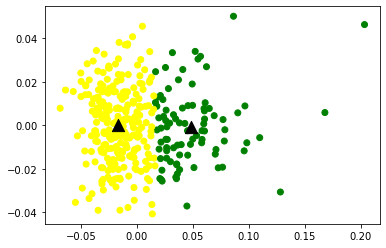

In [554]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=100) 
X = kmeans_model.fit(d2v_model.docvecs.vectors_docs)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs)
pca = PCA(n_components=2).fit(d2v_model.docvecs.vectors_docs)
datapoint = pca.transform(d2v_model.docvecs.vectors_docs)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()

In [ ]:
list_1 = []
list_0 = []

0 ['exploitation', 'phpbb', 'highlight', 'parameter', 'vulnerability']
0 ['update', 'microsoft', 'internet', 'explorer']
0 ['update', 'available', 'microsoft', 'internet', 'explorer', 'vulnerability']
0 ['cisco', 'io', 'input', 'queue', 'vulnerability']
0 ['vulnerability', 'microsoft', 'internet', 'explorer']
0 ['buffer', 'overflow', 'microsoft', 'internet', 'explorer']
0 ['multiple', 'vulnerability', 'microsoft', 'internet', 'explorer']
0 ['multiple', 'vulnerability', 'microsoft', 'window', 'internet', 'explorer', 'excel']
0 ['multiple', 'vulnerability', 'mozilla', 'product']


NameError: name 'list_1' is not defined

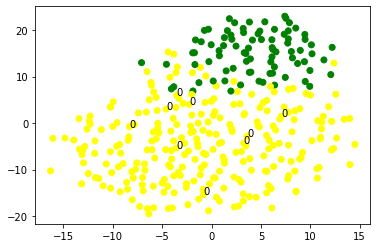

In [555]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=100) 
X = kmeans_model.fit(d2v_model.docvecs.vectors_docs)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs)
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(d2v_model.docvecs.vectors_docs)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(Y[:, 0], Y[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = model.fit_transform(centroids)
#plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=290, c="#000000", alpha=.5)
for j in range(len(lst_corpus)):
    if(labels[j]==1):
        list_1.append(lst_corpus)
    plt.annotate(labels[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
    print ("%s %s" % (labels[j],  lst_corpus[j]))
plt.show()

In [ ]:
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(d2v_model.docvecs.vectors_docs, assign_clusters=True)
     
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS,init = 'k-means++',max_iter=100)
kmeans.fit(d2v_model.docvecs.vectors_docs)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(d2v_model.docvecs.vectors_docs)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(lst_corpus)):    
   if()
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  lst_corpus[j]))
 
 
plt.show()

In [206]:
df.to_csv('0311_CVE.csv')

In [ ]:
d2v_model.docvecs.vectors_docs[5:10]

In [ ]:
from rake_nltk import Rake

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
a = porter.stem(temp_1)
print(a)